## NB for exploring different NN parameters

In [1]:
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
sys.path.append('/home/usc/ie/mpm/NEXT_graphs')

from NEXT_graphNN.utils.read_tensorboard import load_tensorboard_df
from sklearn.metrics import roc_curve, auc

# 13 bar

In [2]:
pressure = '13bar'
path = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/{}/neural_network'.format(pressure)

tb_files = glob.glob(path + '/*/tensorboard_dir/*')

## Learning rate & dropout

### LOSS

In [18]:
# for f in tb_files:
#     spl = f.split('/')[-3].split('_')
#     lr, do, bs, nconv = spl[1], spl[3], spl[5], spl[7]
#     df = load_tensorboard_df(f)
#     plt.plot(df.step, df.loss_train)
#     plt.ylabel('train loss')
#     plt.xlabel('epoch')
#     plt.xticks(df.step)

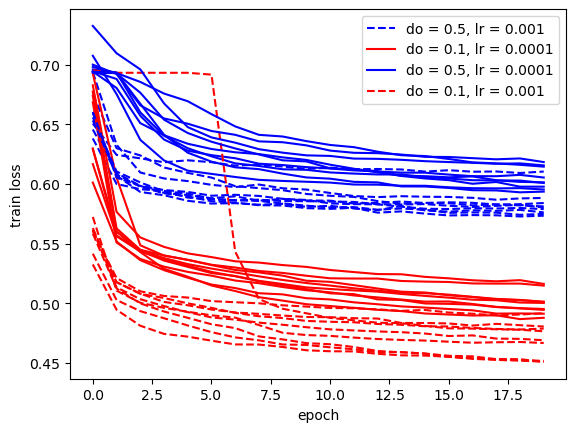

In [4]:
# Define colors for different values of do
color_map = {'0.1': 'red', '0.5': 'blue'}
lstyle_map = {'0.001': '--', '0.0001': '-'}

# Dictionary to store lines for each do value
line_dict = {}

# Iterate over tb_files
for f in tb_files:
    spl = f.split('/')[-3].split('_')
    lr, do, bs, nconv = spl[1], spl[3], spl[5], spl[7]
    df = load_tensorboard_df(f)
    
    # Plot each line separately and specify label
    line, = plt.plot(df.step, df.loss_train, color=color_map[do], ls = lstyle_map[lr])
    
    # Store line for the current value of do
    name = 'do = ' + do
    name = name + ', lr = ' + lr
    if name not in line_dict:
        line_dict[name] = line

plt.ylabel('train loss')
plt.xlabel('epoch')

# Create legend with custom labels for each value of do
plt.legend(line_dict.values(), line_dict.keys())

plt.show()


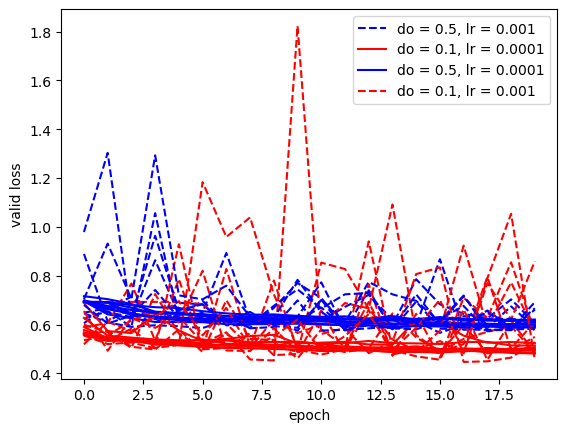

In [5]:
# Define colors for different values of do
color_map = {'0.1': 'red', '0.5': 'blue'}
lstyle_map = {'0.001': '--', '0.0001': '-'}

# Dictionary to store lines for each do value
line_dict = {}

# Iterate over tb_files
for f in tb_files:
    spl = f.split('/')[-3].split('_')
    lr, do, bs, nconv = spl[1], spl[3], spl[5], spl[7]
    df = load_tensorboard_df(f)
    # Plot each line separately and specify label
    line, = plt.plot(df.step, df.loss_valid, color=color_map[do], ls = lstyle_map[lr])
    
    # Store line for the current value of do
    
    name = 'do = ' + do
    name = name + ', lr = ' + lr
    if name not in line_dict:
        line_dict[name] = line

plt.ylabel('valid loss')
plt.xlabel('epoch')

# Create legend with custom labels for each value of do
plt.legend(line_dict.values(), line_dict.keys())

plt.show()

## ACCURACY

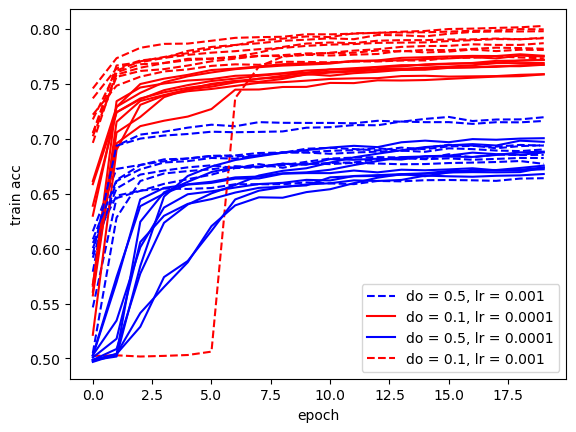

In [6]:
# Define colors for different values of do
color_map = {'0.1': 'red', '0.5': 'blue'}
lstyle_map = {'0.001': '--', '0.0001': '-'}

# Dictionary to store lines for each do value
line_dict = {}

# Iterate over tb_files
for f in tb_files:
    spl = f.split('/')[-3].split('_')
    lr, do, bs, nconv = spl[1], spl[3], spl[5], spl[7]
    df = load_tensorboard_df(f)
    
    # Plot each line separately and specify label
    line, = plt.plot(df.step, df.acc_train, color=color_map[do], ls = lstyle_map[lr])
    
    # Store line for the current value of do
    name = 'do = ' + do
    name = name + ', lr = ' + lr
    if name not in line_dict:
        line_dict[name] = line

plt.ylabel('train acc')
plt.xlabel('epoch')

# Create legend with custom labels for each value of do
plt.legend(line_dict.values(), line_dict.keys())

plt.show()

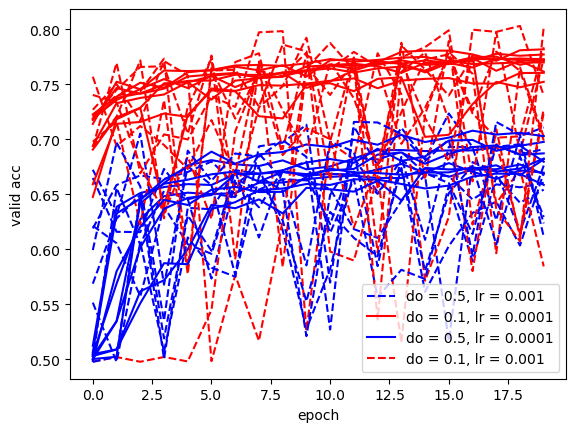

In [7]:
# Define colors for different values of do
color_map = {'0.1': 'red', '0.5': 'blue'}
lstyle_map = {'0.001': '--', '0.0001': '-'}

# Dictionary to store lines for each do value
line_dict = {}

# Iterate over tb_files
for f in tb_files:
    spl = f.split('/')[-3].split('_')
    lr, do, bs, nconv = spl[1], spl[3], spl[5], spl[7]
    df = load_tensorboard_df(f)
    
    # Plot each line separately and specify label
    line, = plt.plot(df.step, df.acc_valid, color=color_map[do], ls = lstyle_map[lr])
    
    # Store line for the current value of do
    name = 'do = ' + do
    name = name + ', lr = ' + lr
    if name not in line_dict:
        line_dict[name] = line

plt.ylabel('valid acc')
plt.xlabel('epoch')

# Create legend with custom labels for each value of do
plt.legend(line_dict.values(), line_dict.keys())

plt.show()

In [8]:
# for f in tb_files:
#     spl = f.split('/')[-3].split('_')
#     lr, do, bs, nconv = spl[1], spl[3], spl[5], spl[7]
#     df = load_tensorboard_df(f)
#     if lr == '0.001':
#         line = 'r-'
#     if lr == '0.0001':
#         line = 'g--'
#     plt.plot(df.step, df.loss_train, line)
#     plt.ylabel('train loss')
#     plt.xlabel('epoch')
#     plt.xticks(df.step)
# plt.legend(['0.001', '0.0001'])
# plt.title('learning rate')


Parece que el learning rate mas pequeño aunque no consiga tan buenos resultados es más estable en la validation loss y accuracy no? Eso entiendo que es bueno y que va towards mejorar... Lo que quiere decir es que además quizás en el LR grande está overfitting y por eso vemos que desciende más la loss para el train con el LR grande pero sin embargo al mirar el validation está descontrolado...

## Other parameters

### LOSS

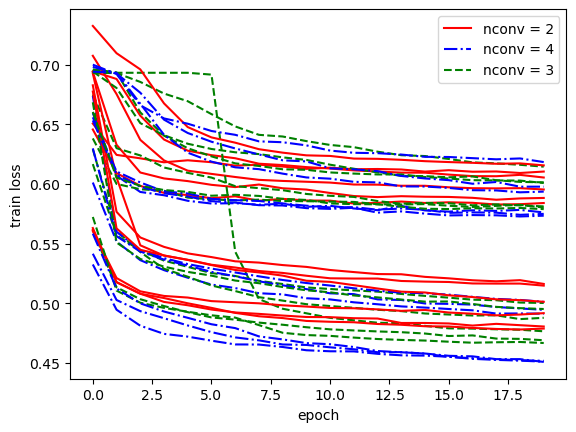

In [9]:
# Define colors for different values of do
color_map = {'2': 'red', '3': 'green', '4':'blue'}
lstyle_map = {'2': '-', '3': '--', '4':'-.'}

# Dictionary to store lines for each do value
line_dict = {}

# Iterate over tb_files
for f in tb_files:
    spl = f.split('/')[-3].split('_')
    lr, do, bs, nconv = spl[1], spl[3], spl[5], spl[7]
    df = load_tensorboard_df(f)
    
    # Plot each line separately and specify label
    line, = plt.plot(df.step, df.loss_train, color=color_map[nconv], ls = lstyle_map[nconv])
    
    # Store line for the current value of do
    name = 'nconv = ' + nconv
    #name = name + ', lr = ' + lr
    if name not in line_dict:
        line_dict[name] = line

plt.ylabel('train loss')
plt.xlabel('epoch')

# Create legend with custom labels for each value of do
plt.legend(line_dict.values(), line_dict.keys())

plt.show()

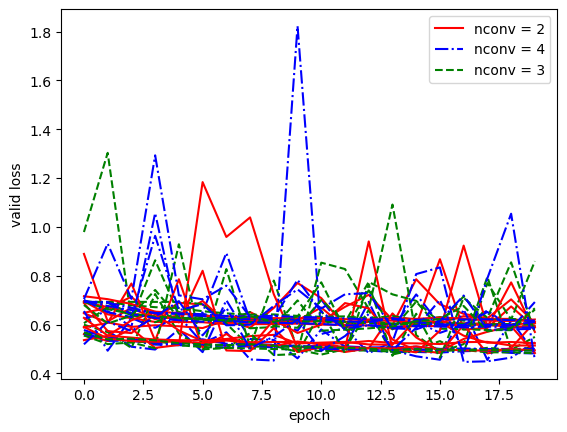

In [10]:
# Define colors for different values of do
color_map = {'2': 'red', '3': 'green', '4':'blue'}
lstyle_map = {'2': '-', '3': '--', '4':'-.'}

# Dictionary to store lines for each do value
line_dict = {}

# Iterate over tb_files
for f in tb_files:
    spl = f.split('/')[-3].split('_')
    lr, do, bs, nconv = spl[1], spl[3], spl[5], spl[7]
    df = load_tensorboard_df(f)
    
    # Plot each line separately and specify label
    line, = plt.plot(df.step, df.loss_valid, color=color_map[nconv], ls = lstyle_map[nconv])
    
    # Store line for the current value of do
    name = 'nconv = ' + nconv
    #name = name + ', lr = ' + lr
    if name not in line_dict:
        line_dict[name] = line

plt.ylabel('valid loss')
plt.xlabel('epoch')

# Create legend with custom labels for each value of do
plt.legend(line_dict.values(), line_dict.keys())

plt.show()

## ACCURACY

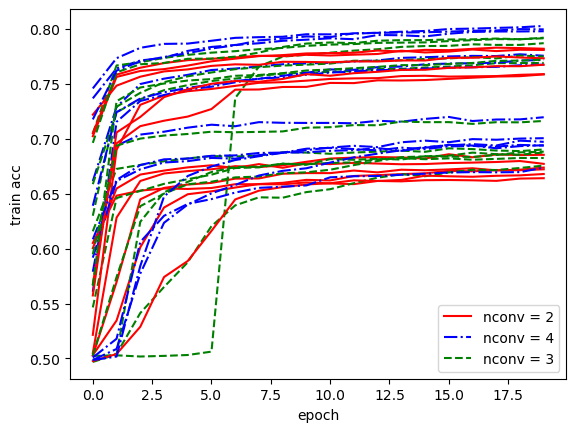

In [11]:
# Define colors for different values of do
color_map = {'2': 'red', '3': 'green', '4':'blue'}
lstyle_map = {'2': '-', '3': '--', '4':'-.'}

# Dictionary to store lines for each do value
line_dict = {}

# Iterate over tb_files
for f in tb_files:
    spl = f.split('/')[-3].split('_')
    lr, do, bs, nconv = spl[1], spl[3], spl[5], spl[7]
    df = load_tensorboard_df(f)
    
    # Plot each line separately and specify label
    line, = plt.plot(df.step, df.acc_train, color=color_map[nconv], ls = lstyle_map[nconv])
    
    # Store line for the current value of do
    name = 'nconv = ' + nconv
    #name = name + ', lr = ' + lr
    if name not in line_dict:
        line_dict[name] = line

plt.ylabel('train acc')
plt.xlabel('epoch')

# Create legend with custom labels for each value of do
plt.legend(line_dict.values(), line_dict.keys())

plt.show()

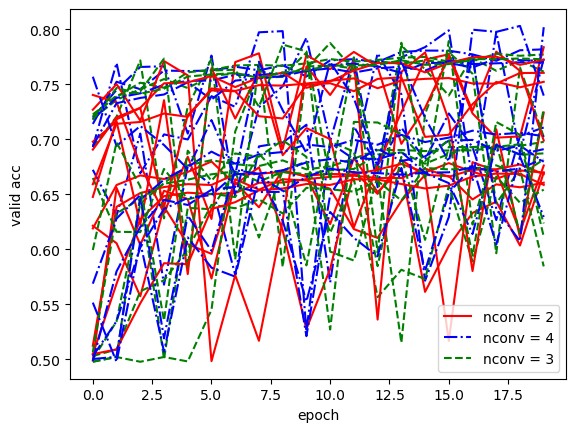

In [12]:
# Define colors for different values of do
color_map = {'2': 'red', '3': 'green', '4':'blue'}
lstyle_map = {'2': '-', '3': '--', '4':'-.'}

# Dictionary to store lines for each do value
line_dict = {}

# Iterate over tb_files
for f in tb_files:
    spl = f.split('/')[-3].split('_')
    lr, do, bs, nconv = spl[1], spl[3], spl[5], spl[7]
    df = load_tensorboard_df(f)
    
    # Plot each line separately and specify label
    line, = plt.plot(df.step, df.acc_valid, color=color_map[nconv], ls = lstyle_map[nconv])
    
    # Store line for the current value of do
    name = 'nconv = ' + nconv
    #name = name + ', lr = ' + lr
    if name not in line_dict:
        line_dict[name] = line

plt.ylabel('valid acc')
plt.xlabel('epoch')

# Create legend with custom labels for each value of do
plt.legend(line_dict.values(), line_dict.keys())

plt.show()

## ROC AUC

In [47]:
pred_files = glob.glob(path + '/*/test_prediction.h5')

A ver, la red se había guardado el mejor modelo en la validación, entonces tiene sentido que me salgan estas cosas (es decir, que esté de acuerdo el mejor train con el mejor test, aunque en validation veamos que es inestable); a lo mejor sólo llegó en estos casos 1 vez a hacer el checkpoint, pero ya le es suficiente para que salga una curva de puta madre

0.001 0.5 32 2 0.7236223318881774
0.0001 0.1 32 4 0.8440624925920119
0.001 0.1 64 4 0.86185762364
0.001 0.1 32 4 0.8649606343362236
0.001 0.1 128 4 0.8654559764772691


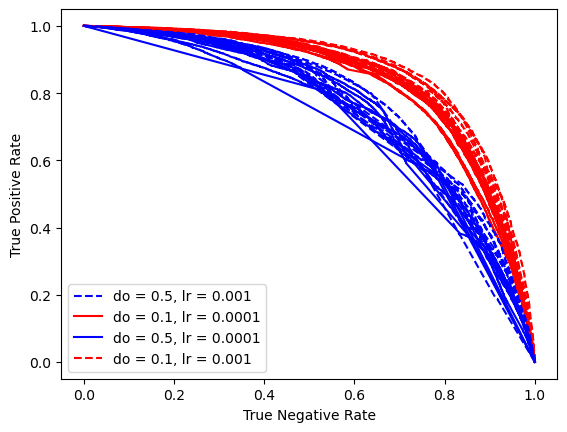

In [15]:
# Define colors for different values of do
color_map = {'0.1': 'red', '0.5': 'blue'}
lstyle_map = {'0.001': '--', '0.0001': '-'}

# Dictionary to store lines for each do value
line_dict = {}
roc_auc_old = 0
# Iterate over tb_files
for f in pred_files:
    spl = f.split('/')[-2].split('_')
    lr, do, bs, nconv = spl[1], spl[3], spl[5], spl[7]
    prediction = pd.read_hdf(f, 'EventPred')
    y_true = prediction.binclass
    y_pred = prediction.class_1
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot each line separately and specify label
    line, = plt.plot(1-fpr, tpr, color=color_map[do], ls = lstyle_map[lr])
    if roc_auc > roc_auc_old:
        print(lr, do, bs, nconv, roc_auc)
        roc_auc_old = roc_auc
    # Store line for the current value of do
    name = 'do = ' + do
    name = name + ', lr = ' + lr
    if name not in line_dict:
        line_dict[name] = line

plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')

# Create legend with custom labels for each value of do
plt.legend(line_dict.values(), line_dict.keys())

plt.show()

### Filter taking out the unstable LR and the worst DO

0.0001 0.1 32 4 0.8440624925920119
0.0001 0.1 32 3 0.8336143018066239
0.0001 0.1 128 2 0.8157690815221015
0.0001 0.1 64 3 0.8412580820705468
0.0001 0.1 64 4 0.8375631136919207
0.0001 0.1 128 4 0.830780848423469
0.0001 0.1 64 2 0.8193782934938739
0.0001 0.1 32 2 0.8345035111438142
0.0001 0.1 128 3 0.8376072268557422


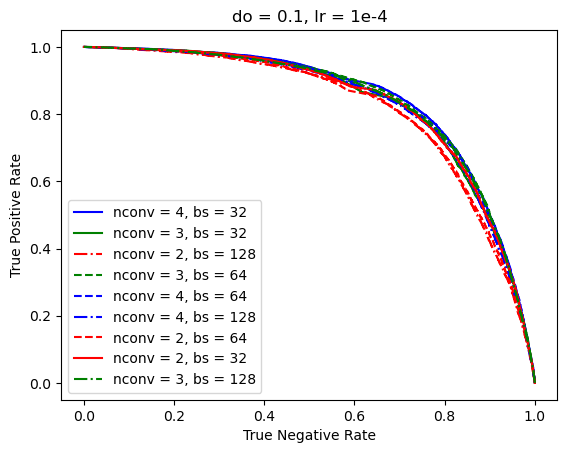

In [16]:
# Define colors for different values of do
color_map = {'2': 'red', '3': 'green', '4':'blue'}
lstyle_map = {'32': '-', '64': '--', '128':'-.'}

# Dictionary to store lines for each do value
line_dict = {}
roc_auc_old = 0
# Iterate over tb_files
for f in pred_files:
    spl = f.split('/')[-2].split('_')
    lr, do, bs, nconv = spl[1], spl[3], spl[5], spl[7]
    if lr == '0.001' or do == '0.5':
        continue
    prediction = pd.read_hdf(f, 'EventPred')
    y_true = prediction.binclass
    y_pred = prediction.class_1
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot each line separately and specify label
    line, = plt.plot(1-fpr, tpr, color=color_map[nconv], ls = lstyle_map[bs])
    # if roc_auc > roc_auc_old:
    #     print(lr, do, bs, nconv, roc_auc)
    #     roc_auc_old = roc_auc
    print(lr, do, bs, nconv, roc_auc)
    # Store line for the current value of do
    name = 'nconv = ' + nconv
    name = name + ', bs = ' + bs
    if name not in line_dict:
        line_dict[name] = line

plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')
plt.title('do = 0.1, lr = 1e-4')

# Create legend with custom labels for each value of do
plt.legend(line_dict.values(), line_dict.keys())

plt.show()

## "Final" train: a serious train after deciding the optimal parameters

In [2]:
tb = load_tensorboard_df('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/13bar/train/logs/events.out.tfevents.1714060621.c201-47.4047236.0')
tb_2 = load_tensorboard_df('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/13bar/train/logs/events.out.tfevents.1714129778.c201-32.3174650.0')
tb_2.step = tb_2.step + tb.step.values[-1] + 1
full_tb = tb.append(tb_2)

In [3]:
print('Mean time per epoch: ', ((tb.wall_time.shift(-1) - tb.wall_time ) / 60).mean(), ' mins')

Mean time per epoch:  3.613876796424184  mins


In [4]:
print('Mean time per epoch: ', ((tb_2.wall_time.shift(-1) - tb_2.wall_time ) / 60).mean(), ' mins')

Mean time per epoch:  3.776059802629615  mins


In [5]:
(((tb.wall_time.shift(-1) - tb.wall_time ) / 60).mean() * len(tb) + ((tb_2.wall_time.shift(-1) - tb_2.wall_time ) / 60).mean() * len(tb_2)) / len(full_tb)

3.693278893212259

The new more convolutional train:

In [6]:
conv_tb = load_tensorboard_df('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/13bar/conv_train/logs/events.out.tfevents.1715185900.c204-46.1448650.0')
conv_tb_2 = load_tensorboard_df('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/13bar/conv_train/logs/events.out.tfevents.1715365882.c202-44.2616173.0')
conv_tb_2.step = conv_tb_2.step + conv_tb.step.values[-1] + 1
conv_full_tb = conv_tb.append(conv_tb_2)

In [7]:
print('Mean time per epoch: ', ((conv_tb.wall_time.shift(-1) - conv_tb.wall_time ) / 60).mean(), ' mins')

Mean time per epoch:  24.771017560656645  mins


In [8]:
print('Mean time per epoch: ', ((conv_tb_2.wall_time.shift(-1) - conv_tb_2.wall_time ) / 60).mean(), ' mins')

Mean time per epoch:  27.34932090445065  mins


In [9]:
(((conv_tb.wall_time.shift(-1) - conv_tb.wall_time ) / 60).mean() * len(conv_tb) + ((conv_tb_2.wall_time.shift(-1) - conv_tb_2.wall_time ) / 60).mean() * len(conv_tb_2)) / len(conv_full_tb)

26.323697474875132

Trying gpus

In [10]:
gpu_tb = load_tensorboard_df('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/13bar/gpu_train/logs/events.out.tfevents.1715615776.c209-2.1181714.0')

In [11]:
print('Mean time per epoch: ', ((gpu_tb.wall_time.shift(-1) - gpu_tb.wall_time ) / 60).mean(), ' mins')

Mean time per epoch:  1.3137963405406252  mins


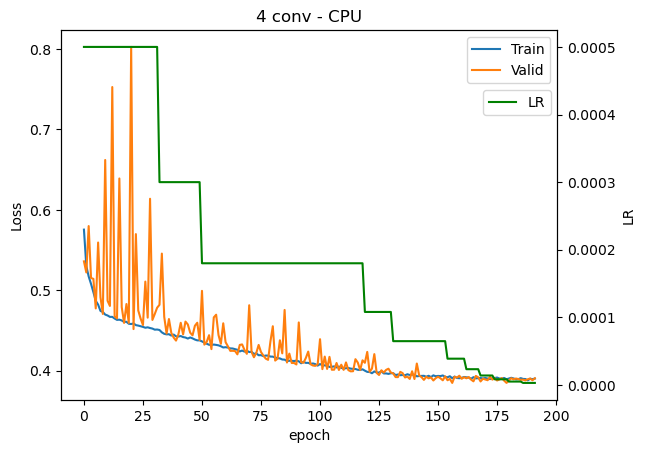

In [15]:
epochs = full_tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, full_tb.loss_train, '-', label = 'Train')
ax1.plot(epochs, full_tb.loss_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()


ax2.plot(epochs, full_tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
ax1.legend()
plt.title('4 conv - CPU')
ax2.legend(loc = (0.85, 0.77))
#ax2.set_yscale('log')


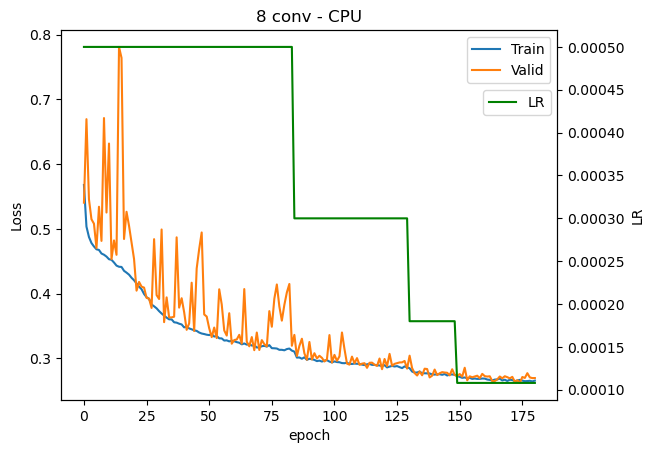

In [16]:
epochs = conv_full_tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, conv_full_tb.loss_train, '-', label = 'Train')
ax1.plot(epochs, conv_full_tb.loss_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()


ax2.plot(epochs, conv_full_tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
ax1.legend()
plt.title('8 conv - CPU')
ax2.legend(loc = (0.85, 0.77))
#ax2.set_yscale('log')

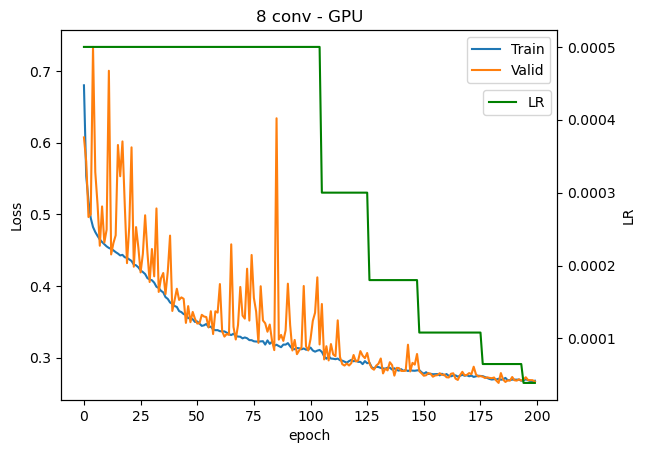

In [18]:
epochs = gpu_tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, gpu_tb.loss_train, '-', label = 'Train')
ax1.plot(epochs, gpu_tb.loss_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()


ax2.plot(epochs, gpu_tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
ax1.legend()
plt.title('8 conv - GPU')

ax2.legend(loc = (0.85, 0.77))
#ax2.set_yscale('log')

Text(0.5, 1.0, '4 conv - CPU')

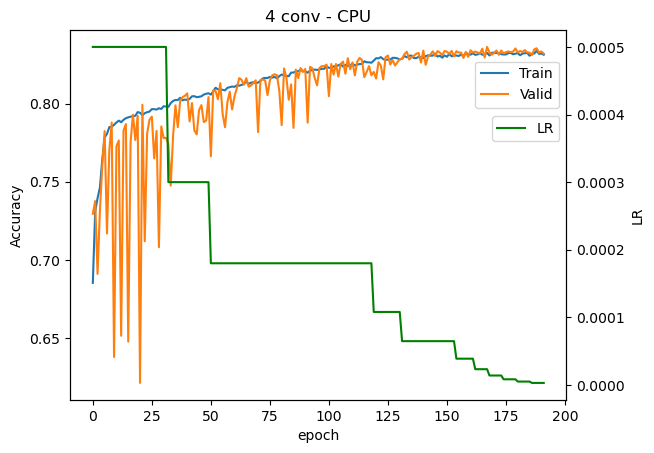

In [19]:
epochs = full_tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, full_tb.acc_train, '-', label = 'Train')
ax1.plot(epochs, full_tb.acc_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Accuracy')

ax2 = ax1.twinx()
ax2.plot(epochs, full_tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
ax1.legend()

ax1.legend(loc = (0.816, 0.79))
ax2.legend(loc = (0.85, 0.7))
plt.title('4 conv - CPU')
# ax2.set_yscale('log')
# ax1.legend(loc = (0, 1.02))
# ax2.legend(loc = (0.86, 1.02))

Text(0.5, 1.0, '8 conv - CPU')

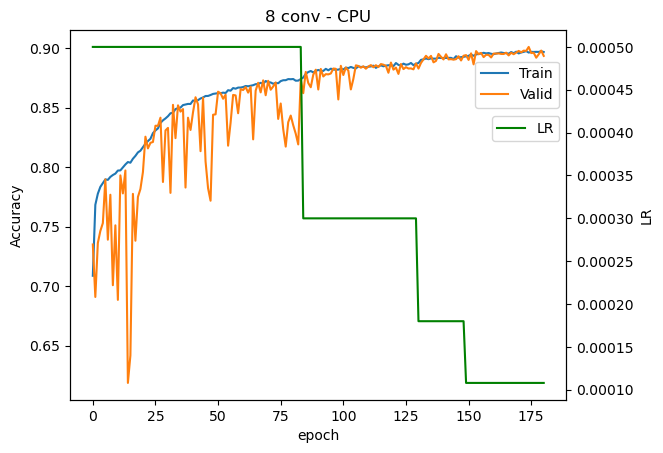

In [20]:
epochs = conv_full_tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, conv_full_tb.acc_train, '-', label = 'Train')
ax1.plot(epochs, conv_full_tb.acc_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Accuracy')

ax2 = ax1.twinx()
ax2.plot(epochs, conv_full_tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
ax1.legend()

ax1.legend(loc = (0.816, 0.79))
ax2.legend(loc = (0.85, 0.7))
plt.title('8 conv - CPU')

# ax2.set_yscale('log')
# ax1.legend(loc = (0, 1.02))
# ax2.legend(loc = (0.86, 1.02))

Text(0.5, 1.0, '8 conv - GPU')

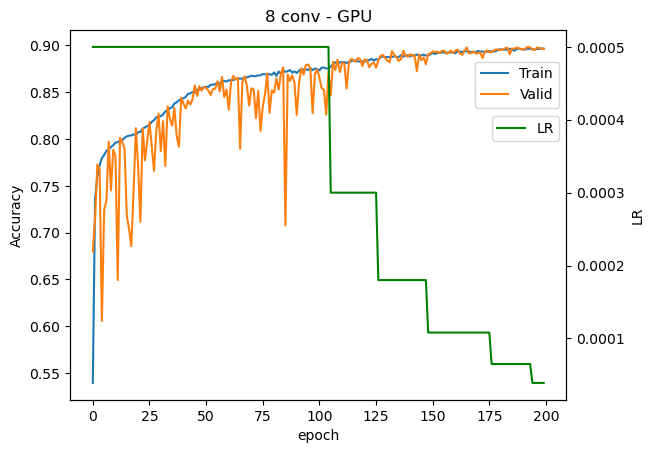

In [21]:
epochs = gpu_tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, gpu_tb.acc_train, '-', label = 'Train')
ax1.plot(epochs, gpu_tb.acc_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Accuracy')

ax2 = ax1.twinx()
ax2.plot(epochs, gpu_tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
ax1.legend()

ax1.legend(loc = (0.816, 0.79))
ax2.legend(loc = (0.85, 0.7))
plt.title('8 conv - GPU')

# ax2.set_yscale('log')
# ax1.legend(loc = (0, 1.02))
# ax2.legend(loc = (0.86, 1.02))

In [43]:
prediction_13bar = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/13bar/train/test_pred.h5', 'EventPred')

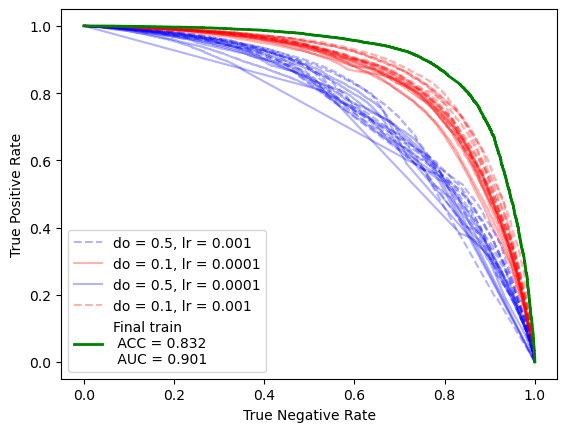

In [63]:
# Define colors for different values of do
color_map = {'0.1': 'red', '0.5': 'blue'}
lstyle_map = {'0.001': '--', '0.0001': '-'}

# Dictionary to store lines for each do value
line_dict = {}
# Iterate over tb_files
for f in pred_files:
    spl = f.split('/')[-2].split('_')
    lr, do, bs, nconv = spl[1], spl[3], spl[5], spl[7]
    # if lr == '0.001' or do == '0.5':
    #     continue
    prediction = pd.read_hdf(f, 'EventPred')
    y_true = prediction.binclass
    y_pred = prediction.class_1
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    
    # Plot each line separately and specify label
    line, = plt.plot(1-fpr, tpr, color=color_map[do], ls = lstyle_map[lr], alpha = 0.3)

    # Store line for the current value of do
    name = 'do = ' + do
    name = name + ', lr = ' + lr
    if name not in line_dict:
        line_dict[name] = line

plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')

y_true = prediction_13bar.binclass
y_pred = prediction_13bar.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_13bar[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_13bar.binclass.values) / len(prediction_13bar)

line, = plt.plot(1-fpr, tpr, 'g', lw = 2)
line_dict['Final train\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
plt.legend(line_dict.values(), line_dict.keys())

plt.show()

# 5 bar

### LOSS

In [64]:
pressure = '5bar'
path = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/{}/neural_network'.format(pressure)

tb_files = glob.glob(path + '/*/tensorboard_dir/*')

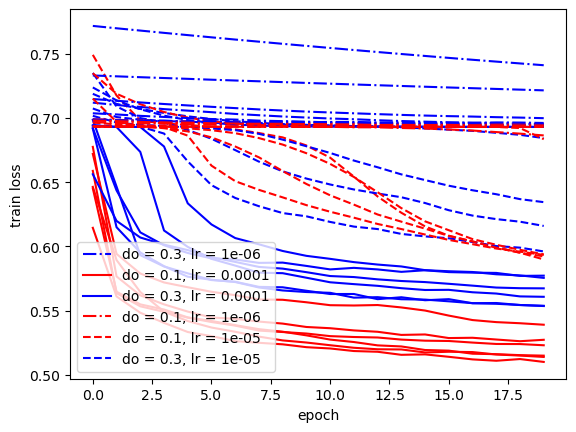

In [70]:
# Define colors for different values of do
color_map = {'0.1': 'red', '0.3': 'blue'}
lstyle_map = {'0.0001': '-', '1e-05': '--', '1e-06': '-.'}

# Dictionary to store lines for each do value
line_dict = {}

# Iterate over tb_files
for f in tb_files:
    spl = f.split('/')[-3].split('_')
    lr, do, bs, nconv = spl[1], spl[3], spl[5], spl[7]
    df = load_tensorboard_df(f)
    
    # Plot each line separately and specify label
    line, = plt.plot(df.step, df.loss_train, color=color_map[do], ls = lstyle_map[lr])
    
    # Store line for the current value of do
    name = 'do = ' + do
    name = name + ', lr = ' + lr
    if name not in line_dict:
        line_dict[name] = line

plt.ylabel('train loss')
plt.xlabel('epoch')

# Create legend with custom labels for each value of do
plt.legend(line_dict.values(), line_dict.keys(), loc = 'lower left')

plt.show()

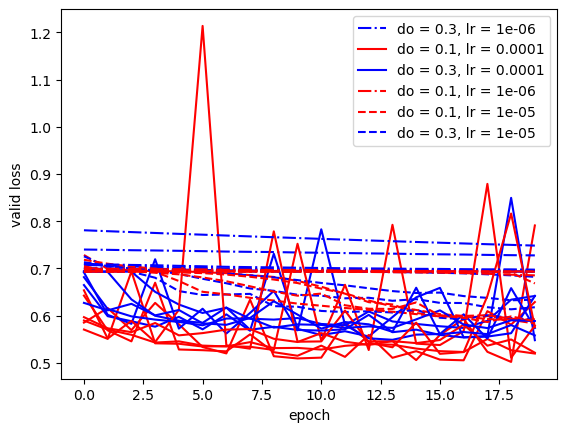

In [71]:
# Define colors for different values of do
color_map = {'0.1': 'red', '0.3': 'blue'}
lstyle_map = {'0.0001': '-', '1e-05': '--', '1e-06': '-.'}

# Dictionary to store lines for each do value
line_dict = {}

# Iterate over tb_files
for f in tb_files:
    spl = f.split('/')[-3].split('_')
    lr, do, bs, nconv = spl[1], spl[3], spl[5], spl[7]
    df = load_tensorboard_df(f)
    # Plot each line separately and specify label
    line, = plt.plot(df.step, df.loss_valid, color=color_map[do], ls = lstyle_map[lr])
    
    # Store line for the current value of do
    
    name = 'do = ' + do
    name = name + ', lr = ' + lr
    if name not in line_dict:
        line_dict[name] = line

plt.ylabel('valid loss')
plt.xlabel('epoch')

# Create legend with custom labels for each value of do
plt.legend(line_dict.values(), line_dict.keys())

plt.show()

### ACCURACY

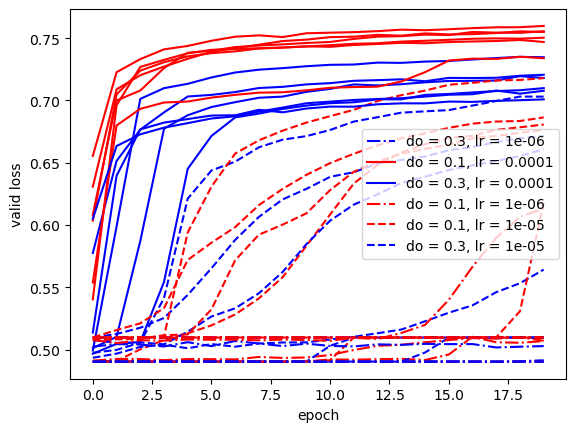

In [72]:
# Define colors for different values of do
color_map = {'0.1': 'red', '0.3': 'blue'}
lstyle_map = {'0.0001': '-', '1e-05': '--', '1e-06': '-.'}

# Dictionary to store lines for each do value
line_dict = {}

# Iterate over tb_files
for f in tb_files:
    spl = f.split('/')[-3].split('_')
    lr, do, bs, nconv = spl[1], spl[3], spl[5], spl[7]
    df = load_tensorboard_df(f)
    # Plot each line separately and specify label
    line, = plt.plot(df.step, df.acc_train, color=color_map[do], ls = lstyle_map[lr])
    
    # Store line for the current value of do
    
    name = 'do = ' + do
    name = name + ', lr = ' + lr
    if name not in line_dict:
        line_dict[name] = line

plt.ylabel('valid loss')
plt.xlabel('epoch')

# Create legend with custom labels for each value of do
plt.legend(line_dict.values(), line_dict.keys())

plt.show()

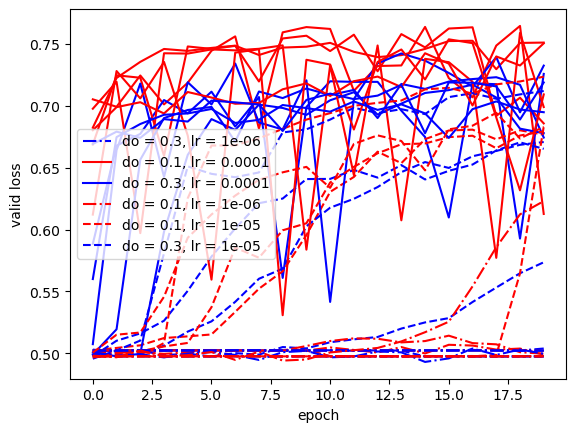

In [73]:
# Define colors for different values of do
color_map = {'0.1': 'red', '0.3': 'blue'}
lstyle_map = {'0.0001': '-', '1e-05': '--', '1e-06': '-.'}

# Dictionary to store lines for each do value
line_dict = {}

# Iterate over tb_files
for f in tb_files:
    spl = f.split('/')[-3].split('_')
    lr, do, bs, nconv = spl[1], spl[3], spl[5], spl[7]
    df = load_tensorboard_df(f)
    # Plot each line separately and specify label
    line, = plt.plot(df.step, df.acc_valid, color=color_map[do], ls = lstyle_map[lr])
    
    # Store line for the current value of do
    
    name = 'do = ' + do
    name = name + ', lr = ' + lr
    if name not in line_dict:
        line_dict[name] = line

plt.ylabel('valid loss')
plt.xlabel('epoch')

# Create legend with custom labels for each value of do
plt.legend(line_dict.values(), line_dict.keys())

plt.show()

### ROC AUC

In [75]:
pred_files = glob.glob(path + '/*/test_prediction.h5')

1e-06 0.3 64 2 0.503586153791348
0.0001 0.1 32 4 0.8352484819560286


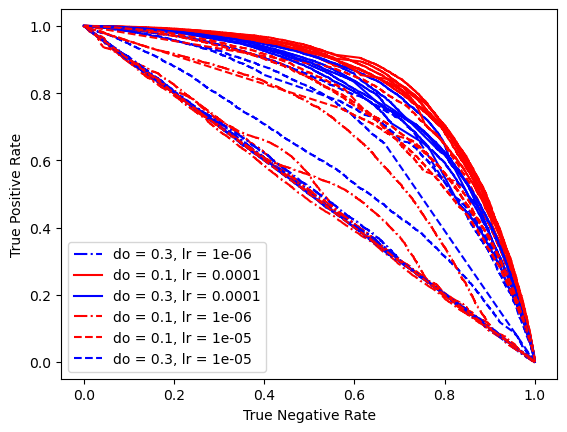

In [76]:
# Define colors for different values of do
color_map = {'0.1': 'red', '0.3': 'blue'}
lstyle_map = {'0.0001': '-', '1e-05': '--', '1e-06': '-.'}

# Dictionary to store lines for each do value
line_dict = {}
roc_auc_old = 0
# Iterate over tb_files
for f in pred_files:
    spl = f.split('/')[-2].split('_')
    lr, do, bs, nconv = spl[1], spl[3], spl[5], spl[7]
    prediction = pd.read_hdf(f, 'EventPred')
    y_true = prediction.binclass
    y_pred = prediction.class_1
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot each line separately and specify label
    line, = plt.plot(1-fpr, tpr, color=color_map[do], ls = lstyle_map[lr])
    if roc_auc > roc_auc_old:
        print(lr, do, bs, nconv, roc_auc)
        roc_auc_old = roc_auc
    # Store line for the current value of do
    name = 'do = ' + do
    name = name + ', lr = ' + lr
    if name not in line_dict:
        line_dict[name] = line

plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')

# Create legend with custom labels for each value of do
plt.legend(line_dict.values(), line_dict.keys())

plt.show()

## "Final" train

In [2]:
tb = load_tensorboard_df('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/5bar/train/logs/events.out.tfevents.1714209065.c202-33.1309696.0')

In [3]:
print('Mean time per epoch: ', ((tb.wall_time.shift(-1) - tb.wall_time ) / 60).mean(), ' mins')

Mean time per epoch:  8.685514870213845  mins


More convs

In [5]:
conv_tb = load_tensorboard_df('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/5bar/conv_train/logs/events.out.tfevents.1715222198.c205-28.2047899.0')

In [6]:
print('Mean time per epoch: ', ((conv_tb.wall_time.shift(-1) - conv_tb.wall_time ) / 60).mean(), ' mins')

Mean time per epoch:  72.80763770822021  mins


Using gpu

In [7]:
gpu_tb = load_tensorboard_df('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/5bar/gpu_train/logs/events.out.tfevents.1715636717.c207-14.3286496.0')

In [8]:
print('Mean time per epoch: ', ((gpu_tb.wall_time.shift(-1) - gpu_tb.wall_time ) / 60).mean(), ' mins')

Mean time per epoch:  3.654657528861877  mins


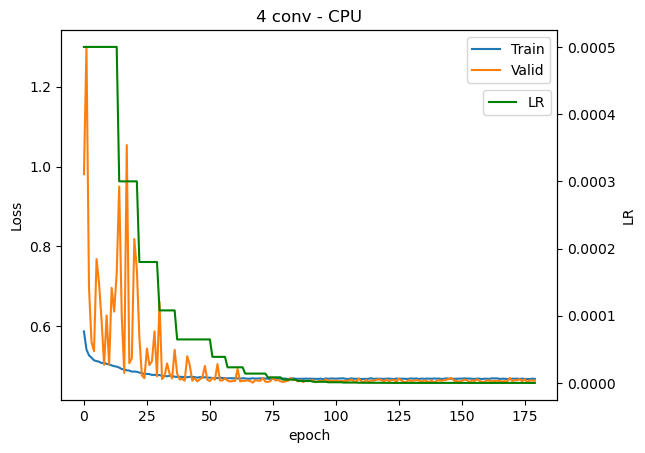

In [24]:
epochs = tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, tb.loss_train, '-', label = 'Train')
ax1.plot(epochs, tb.loss_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()
ax2.plot(epochs, tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
ax1.legend()
plt.title('4 conv - CPU')
ax2.legend(loc = (0.85, 0.77))

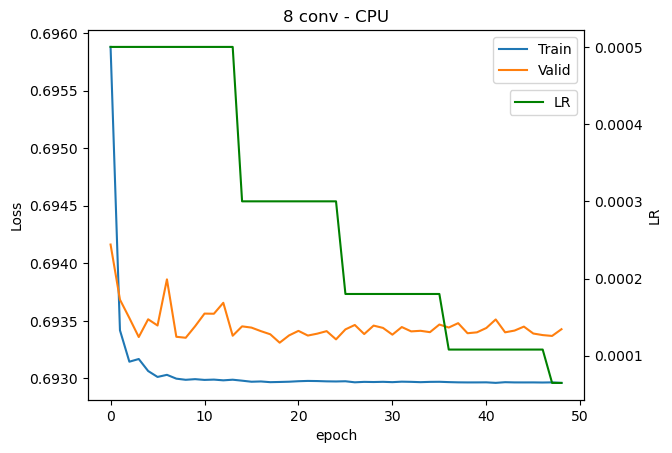

In [25]:
epochs = conv_tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, conv_tb.loss_train, '-', label = 'Train')
ax1.plot(epochs, conv_tb.loss_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()
ax2.plot(epochs, conv_tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
ax1.legend()
plt.title('8 conv - CPU')
ax2.legend(loc = (0.85, 0.77))

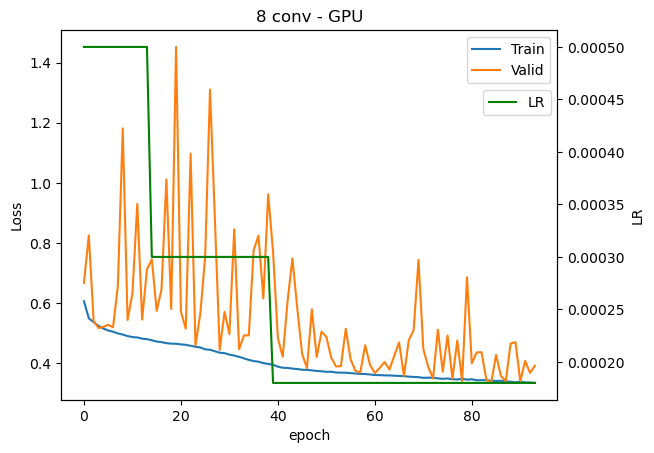

In [26]:
epochs = gpu_tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, gpu_tb.loss_train, '-', label = 'Train')
ax1.plot(epochs, gpu_tb.loss_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()
ax2.plot(epochs, gpu_tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
ax1.legend()
plt.title('8 conv - GPU')
ax2.legend(loc = (0.85, 0.77))

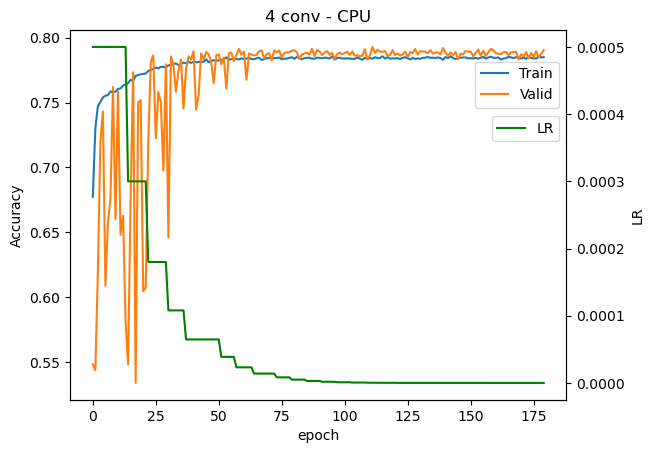

In [27]:
epochs = tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, tb.acc_train, '-', label = 'Train')
ax1.plot(epochs, tb.acc_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Accuracy')

ax2 = ax1.twinx()
ax2.plot(epochs, tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('4 conv - CPU')
ax1.legend(loc = (0.816, 0.79))
ax2.legend(loc = (0.85, 0.7))


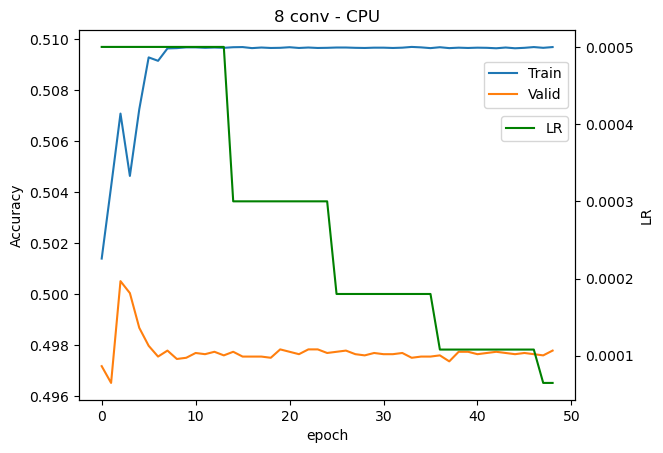

In [28]:
epochs = conv_tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, conv_tb.acc_train, '-', label = 'Train')
ax1.plot(epochs, conv_tb.acc_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Accuracy')

ax2 = ax1.twinx()
ax2.plot(epochs, conv_tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('8 conv - CPU')
ax1.legend(loc = (0.816, 0.79))
ax2.legend(loc = (0.85, 0.7))

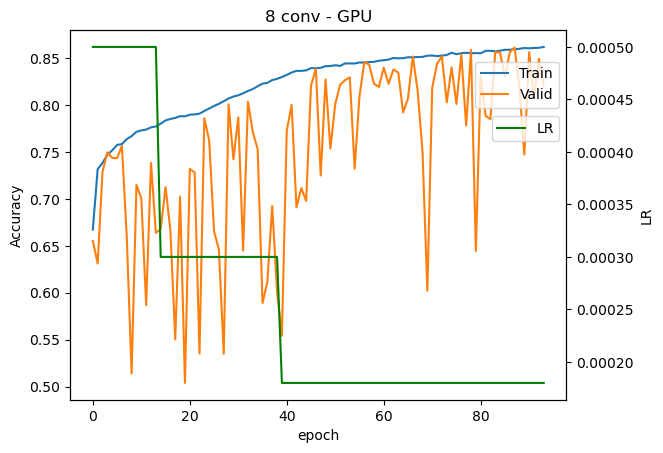

In [29]:
epochs = gpu_tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, gpu_tb.acc_train, '-', label = 'Train')
ax1.plot(epochs, gpu_tb.acc_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Accuracy')

ax2 = ax1.twinx()
ax2.plot(epochs, gpu_tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('8 conv - GPU')
ax1.legend(loc = (0.816, 0.79))
ax2.legend(loc = (0.85, 0.7))

In [81]:
prediction_5bar = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/5bar/train/test_pred.h5', 'EventPred')

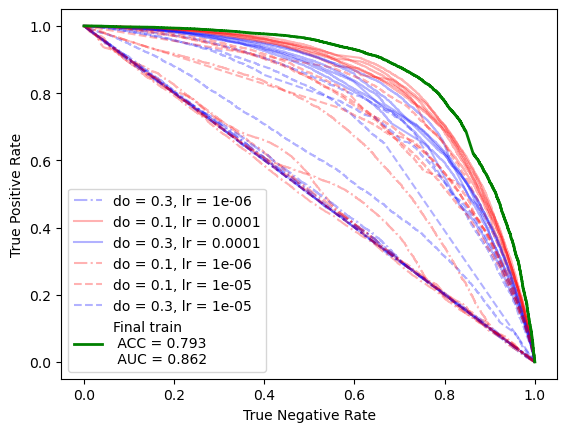

In [82]:
# Define colors for different values of do
color_map = {'0.1': 'red', '0.3': 'blue'}
lstyle_map = {'0.0001': '-', '1e-05': '--', '1e-06': '-.'}

# Dictionary to store lines for each do value
line_dict = {}
# Iterate over tb_files
for f in pred_files:
    spl = f.split('/')[-2].split('_')
    lr, do, bs, nconv = spl[1], spl[3], spl[5], spl[7]
    # if lr == '0.001' or do == '0.5':
    #     continue
    prediction = pd.read_hdf(f, 'EventPred')
    y_true = prediction.binclass
    y_pred = prediction.class_1
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    
    # Plot each line separately and specify label
    line, = plt.plot(1-fpr, tpr, color=color_map[do], ls = lstyle_map[lr], alpha = 0.3)

    # Store line for the current value of do
    name = 'do = ' + do
    name = name + ', lr = ' + lr
    if name not in line_dict:
        line_dict[name] = line

plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')

y_true = prediction_5bar.binclass
y_pred = prediction_5bar.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_5bar[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_5bar.binclass.values) / len(prediction_5bar)

line, = plt.plot(1-fpr, tpr, 'g', lw = 2)
line_dict['Final train\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
plt.legend(line_dict.values(), line_dict.keys())

plt.show()

# 2 bar

In [34]:
tb = load_tensorboard_df('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/2bar/train/logs/events.out.tfevents.1714555580.c204-34.1161087.0')

In [35]:
print('Mean time per epoch: ', ((tb.wall_time.shift(-1) - tb.wall_time ) / 60).mean(), ' mins')

Mean time per epoch:  17.76576650382046  mins


In [36]:
conv_tb = load_tensorboard_df('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/2bar/conv_train/logs/events.out.tfevents.1715328886.c205-34.702134.0')

In [38]:
print('Mean time per epoch: ', ((conv_tb.wall_time.shift(-1) - conv_tb.wall_time ) / 60).mean(), ' mins')

Mean time per epoch:  157.65827087118075  mins


In [39]:
gpu_tb = load_tensorboard_df('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/2bar/gpu_train/logs/events.out.tfevents.1715643670.c207-16.1606936.0')

In [40]:
print('Mean time per epoch: ', ((gpu_tb.wall_time.shift(-1) - gpu_tb.wall_time ) / 60).mean(), ' mins')

Mean time per epoch:  5.79153074716267  mins


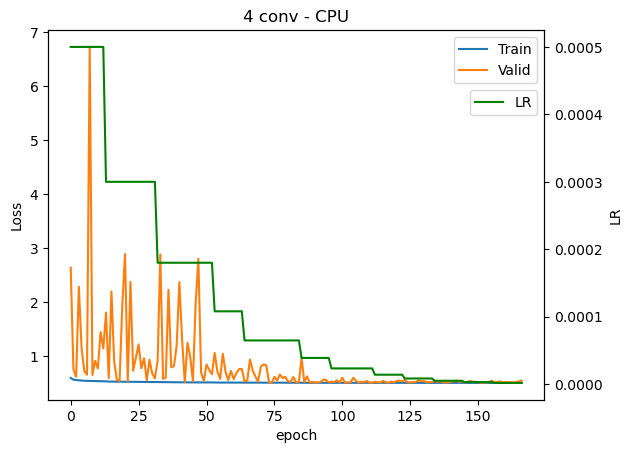

In [44]:
epochs = tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, tb.loss_train, '-', label = 'Train')
ax1.plot(epochs, tb.loss_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()
ax2.plot(epochs, tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('4 conv - CPU')
ax1.legend()
ax2.legend(loc = (0.85, 0.77))

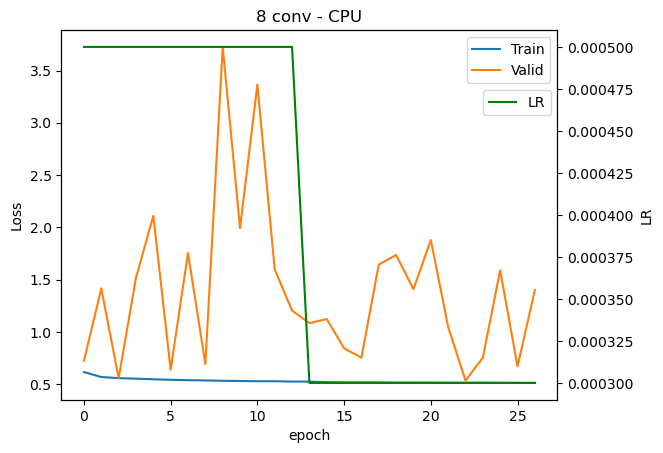

In [46]:
epochs = conv_tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, conv_tb.loss_train, '-', label = 'Train')
ax1.plot(epochs, conv_tb.loss_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()
ax2.plot(epochs, conv_tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('8 conv - CPU')
ax1.legend()
ax2.legend(loc = (0.85, 0.77))

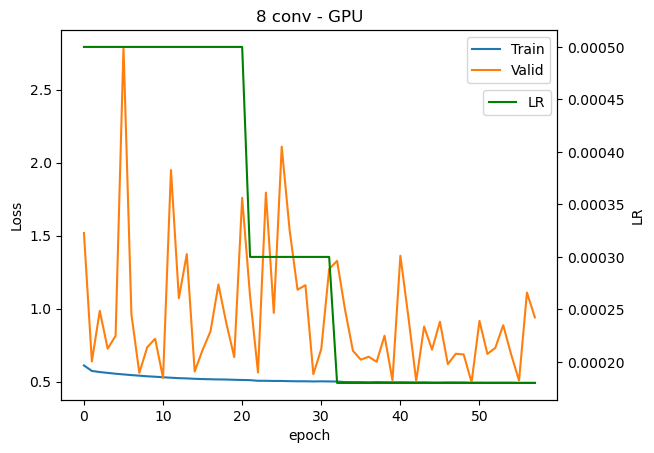

In [47]:
epochs = gpu_tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, gpu_tb.loss_train, '-', label = 'Train')
ax1.plot(epochs, gpu_tb.loss_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()
ax2.plot(epochs, gpu_tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('8 conv - GPU')
ax1.legend()
ax2.legend(loc = (0.85, 0.77))

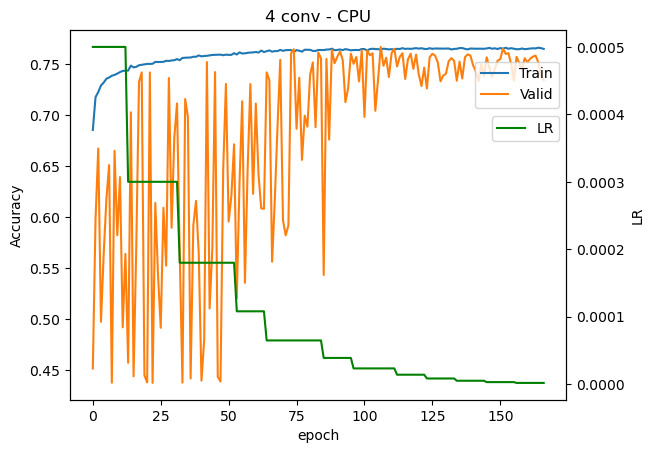

In [48]:
epochs = tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, tb.acc_train, '-', label = 'Train')
ax1.plot(epochs, tb.acc_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Accuracy')

ax2 = ax1.twinx()
ax2.plot(epochs, tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('4 conv - CPU')
ax1.legend(loc = (0.816, 0.79))
ax2.legend(loc = (0.85, 0.7))

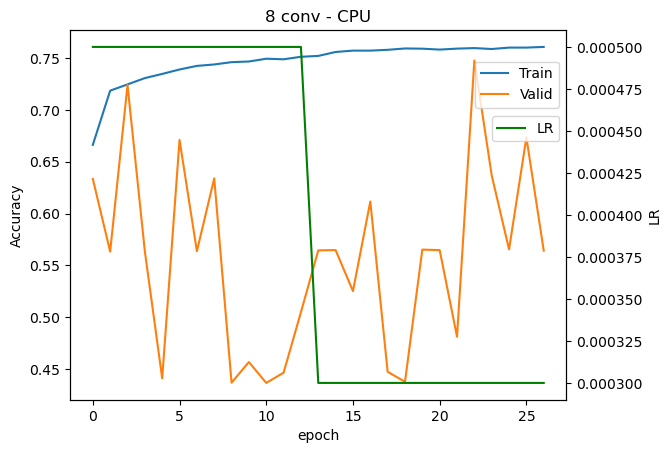

In [49]:
epochs = conv_tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, conv_tb.acc_train, '-', label = 'Train')
ax1.plot(epochs, conv_tb.acc_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Accuracy')

ax2 = ax1.twinx()
ax2.plot(epochs, conv_tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('8 conv - CPU')
ax1.legend(loc = (0.816, 0.79))
ax2.legend(loc = (0.85, 0.7))

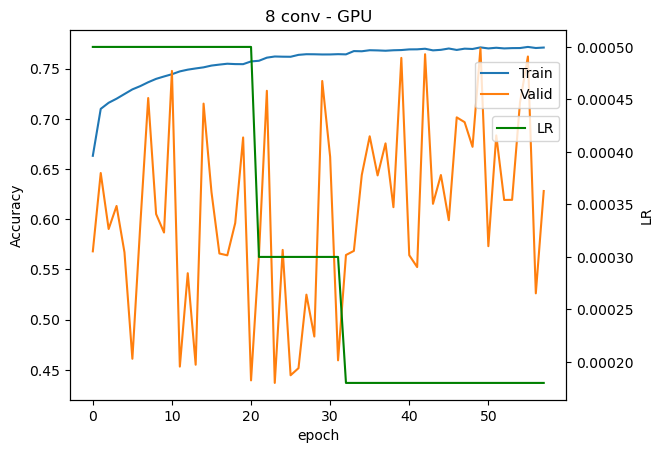

In [50]:
epochs = gpu_tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, gpu_tb.acc_train, '-', label = 'Train')
ax1.plot(epochs, gpu_tb.acc_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Accuracy')

ax2 = ax1.twinx()
ax2.plot(epochs, gpu_tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('8 conv - GPU')
ax1.legend(loc = (0.816, 0.79))
ax2.legend(loc = (0.85, 0.7))

In [9]:
prediction_2bar = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/2bar/train/test_pred.h5', 'EventPred')

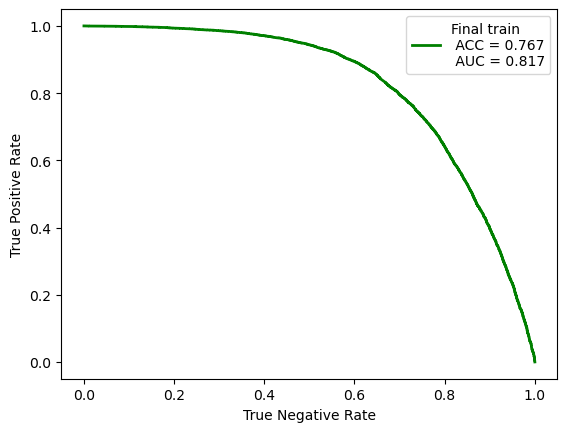

In [10]:

# Dictionary to store lines for each do value
line_dict = {}

y_true = prediction_2bar.binclass
y_pred = prediction_2bar.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_2bar[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_2bar.binclass.values) / len(prediction_2bar)

line, = plt.plot(1-fpr, tpr, 'g', lw = 2)
line_dict['Final train\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
plt.legend(line_dict.values(), line_dict.keys())
plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')
plt.show()

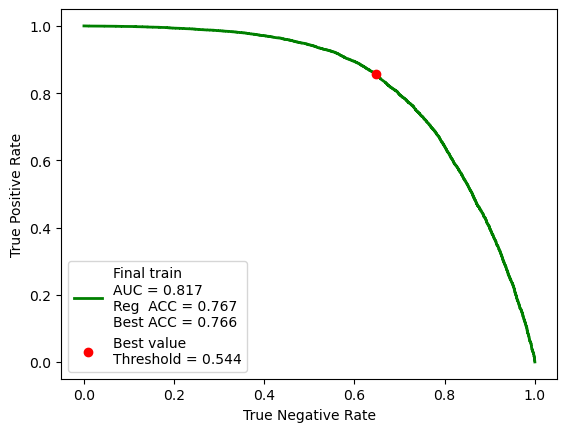

In [11]:
y_true = prediction_2bar.binclass
y_pred = prediction_2bar.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

best_position = np.argmax(tpr - fpr)
best_threshold = thresholds[best_position]

#accuracy con mas del 50%
regular_acc = sum((prediction_2bar['class_1'] > 0.5).astype(int) == prediction_2bar.binclass.values) / len(prediction_2bar)

#accuracy con el mejor threshold
best_acc    = sum((prediction_2bar['class_1'] > best_threshold).astype(int) == prediction_2bar.binclass) / len(prediction_2bar)

plt.plot(1-fpr, tpr, 'g', lw = 2, label = 'Final train\nAUC = {:.3f}\nReg  ACC = {:.3f}\nBest ACC = {:.3f}'.format(roc_auc, regular_acc, best_acc))
plt.plot(1 - fpr[best_position], tpr[np.argmax(tpr - fpr)], 'or', label='Best value\nThreshold = {:.3f}'.format(best_threshold))
plt.legend()
plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [12]:
thresholds

array([1.9892281e+00, 9.8922813e-01, 9.7670025e-01, ..., 3.6853864e-05,
       3.0590752e-05, 1.9392880e-06], dtype=float32)

In [13]:
nsig = sum(y_true)
nbkg = len(y_true) - nsig

In [14]:
nsig, nbkg

(13437, 10354)

In [24]:
sig_eff = np.array([sum((prediction_2bar['class_1'] > th).astype(int)) for th in thresholds]) / len(y_true)
bkg_eff = np.array([sum((prediction_2bar['class_1'] < th).astype(int)) for th in thresholds]) / len(y_true)

In [25]:
fom = sig_eff / np.sqrt(bkg_eff)

/scratch/7080064/ipykernel_1441543/167731298.py:1: RuntimeWarning: divide by zero encountered in true_divide
  fom = sig_eff / np.sqrt(bkg_eff)


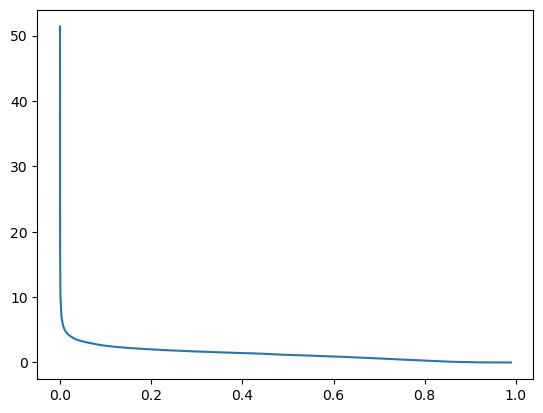

In [26]:
plt.plot(thresholds[1:], fom[1:])


/scratch/7080064/ipykernel_1441543/1758540683.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(thresholds[1:], (tpr / np.sqrt(1-fpr))[1:])


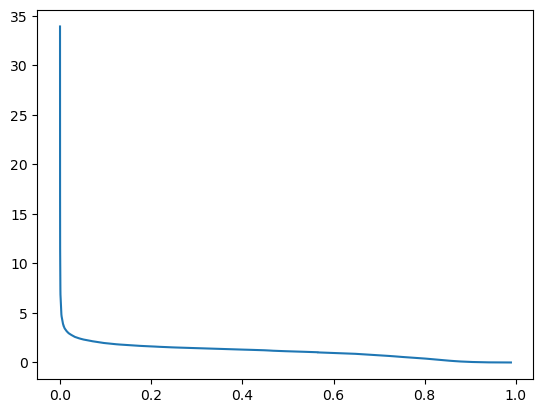

In [23]:
plt.plot(thresholds[1:], (tpr / np.sqrt(1-fpr))[1:])

In [58]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99913077, 0.99913077,
       1.        ])

In [35]:
accuracies = [sum((prediction_2bar['class_1'] > th).astype(int) == prediction_2bar.binclass) / len(prediction_2bar) for th in thresholds]

In [56]:
sum((prediction_2bar['class_1'] > 0.5).astype(int) == prediction_2bar.binclass) / len(prediction_2bar)

0.7665924088941196

In [53]:
sum((prediction_2bar['class_1'] > best_threshold).astype(int) == prediction_2bar.binclass) / len(prediction_2bar)

0.7662141145811441

In [52]:
sum((prediction_2bar['class_1'] > thresholds[np.argmax(accuracies)]).astype(int) == prediction_2bar.binclass) / len(prediction_2bar)

0.7669707032070952

# 1 bar

In [4]:
tb = load_tensorboard_df('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar/train/logs/events.out.tfevents.1714525548.c205-32.1568890.0')

In [3]:
print('Mean time per epoch: ', ((tb.wall_time.shift(-1) - tb.wall_time ) / 60).mean(), ' mins')

Mean time per epoch:  67.94846065509117  mins


In [4]:
conv_tb = load_tensorboard_df('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar/conv_train/logs/events.out.tfevents.1715368210.c203-30.91066.0')

In [5]:
print('Mean time per epoch: ', ((conv_tb.wall_time.shift(-1) - conv_tb.wall_time ) / 60).mean(), ' mins')

Mean time per epoch:  540.6974499132899  mins


In [6]:
gpu_tb = load_tensorboard_df('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar/gpu_train/logs/events.out.tfevents.1715645057.c207-16.1606933.0')

In [7]:
print('Mean time per epoch: ', ((gpu_tb.wall_time.shift(-1) - gpu_tb.wall_time ) / 60).mean(), ' mins')

Mean time per epoch:  11.137417073161512  mins


In [10]:
tb_1cm = load_tensorboard_df('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar_1cm/gpu_train/logs/events.out.tfevents.1716247077.c208-11.736343.0')

In [11]:
print('Mean time per epoch: ', ((tb_1cm.wall_time.shift(-1) - tb_1cm.wall_time ) / 60).mean(), ' mins')

Mean time per epoch:  3.3976421368397514  mins


In [13]:
tb_2cm = load_tensorboard_df('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar_2cm/gpu_train/logs/events.out.tfevents.1716255263.c209-14.2174012.0')

In [14]:
print('Mean time per epoch: ', ((tb_2cm.wall_time.shift(-1) - tb_2cm.wall_time ) / 60).mean(), ' mins')

Mean time per epoch:  2.1787746197233595  mins


In [4]:
tb_5cm = load_tensorboard_df('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar_5cm/gpu_train/logs/events.out.tfevents.1716483805.c209-8.2412216.0')

In [5]:
print('Mean time per epoch: ', ((tb_5cm.wall_time.shift(-1) - tb_5cm.wall_time ) / 60).mean(), ' mins')

Mean time per epoch:  1.4244827814237961  mins


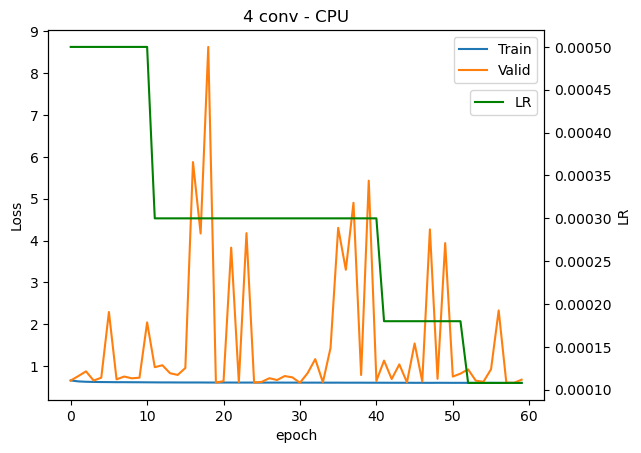

In [58]:
epochs = tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, tb.loss_train, '-', label = 'Train')
ax1.plot(epochs, tb.loss_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()
ax2.plot(epochs, tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('4 conv - CPU')
ax1.legend()
ax2.legend(loc = (0.85, 0.77))

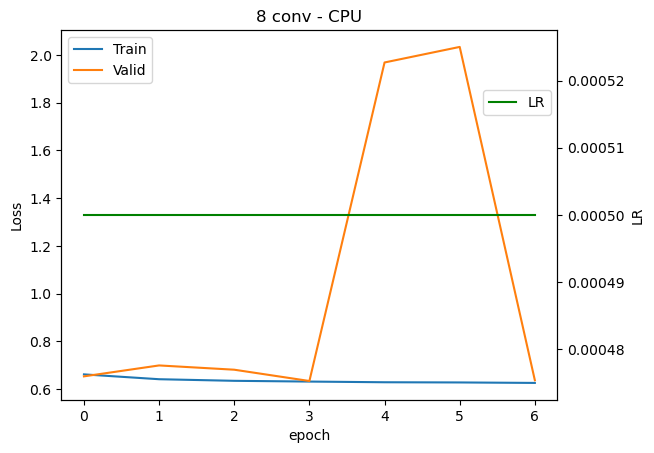

In [59]:
epochs = conv_tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, conv_tb.loss_train, '-', label = 'Train')
ax1.plot(epochs, conv_tb.loss_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()
ax2.plot(epochs, conv_tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('8 conv - CPU')
ax1.legend()
ax2.legend(loc = (0.85, 0.77))

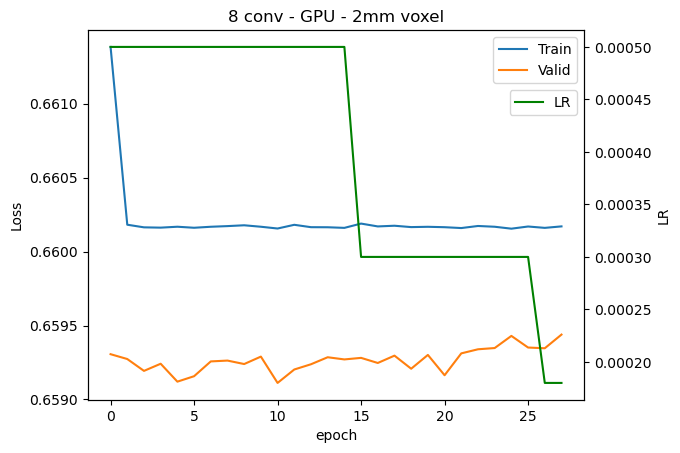

In [41]:
epochs = gpu_tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, gpu_tb.loss_train, '-', label = 'Train')
ax1.plot(epochs, gpu_tb.loss_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()
ax2.plot(epochs, gpu_tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('8 conv - GPU - 2mm voxel')
ax1.legend()
ax2.legend(loc = (0.85, 0.77))

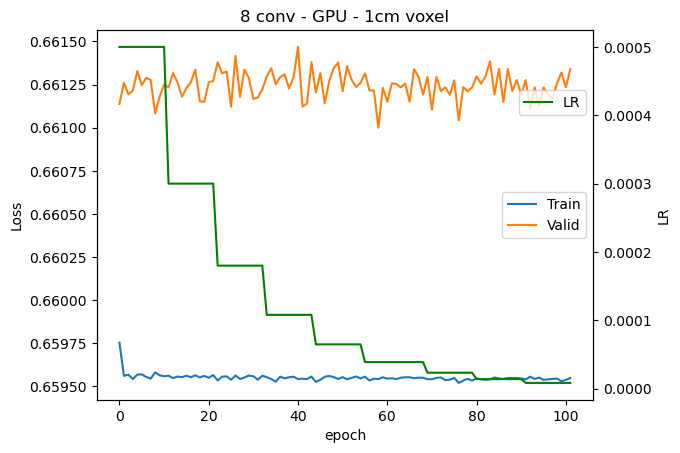

In [28]:
epochs = tb_1cm.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, tb_1cm.loss_train, '-', label = 'Train')
ax1.plot(epochs, tb_1cm.loss_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()
ax2.plot(epochs, tb_1cm.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('8 conv - GPU - 1cm voxel')
ax1.legend()
ax2.legend(loc = (0.85, 0.77))

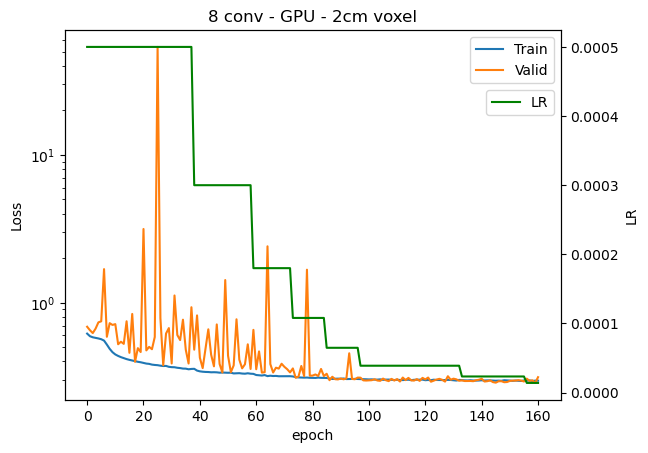

In [31]:
epochs = tb_2cm.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, tb_2cm.loss_train, '-', label = 'Train')
ax1.plot(epochs, tb_2cm.loss_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()
ax2.plot(epochs, tb_2cm.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('8 conv - GPU - 2cm voxel')
ax1.legend()
ax2.legend(loc = (0.85, 0.77))
ax1.set_yscale('log')

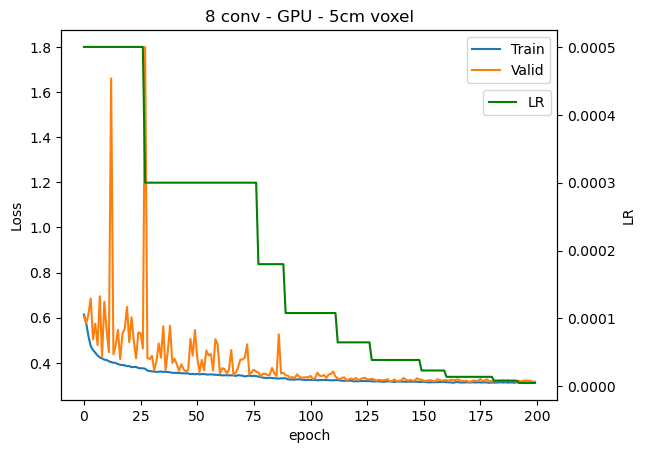

In [8]:
epochs = tb_5cm.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, tb_5cm.loss_train, '-', label = 'Train')
ax1.plot(epochs, tb_5cm.loss_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()
ax2.plot(epochs, tb_5cm.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('8 conv - GPU - 5cm voxel')
ax1.legend()
ax2.legend(loc = (0.85, 0.77))


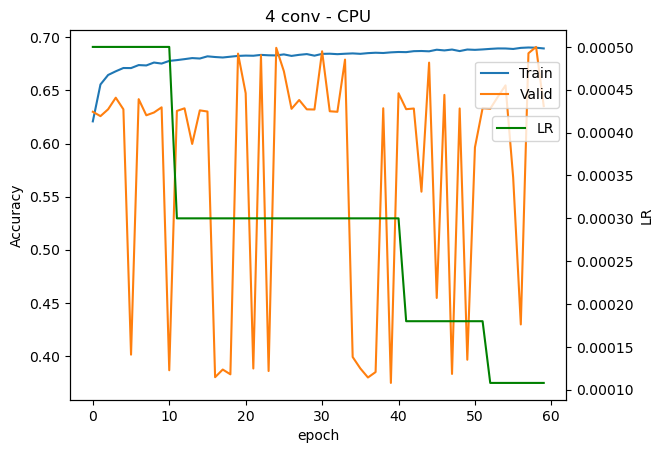

In [32]:
epochs = tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, tb.acc_train, '-', label = 'Train')
ax1.plot(epochs, tb.acc_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Accuracy')

ax2 = ax1.twinx()
ax2.plot(epochs, tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('4 conv - CPU')
ax1.legend(loc = (0.816, 0.79))
ax2.legend(loc = (0.85, 0.7))

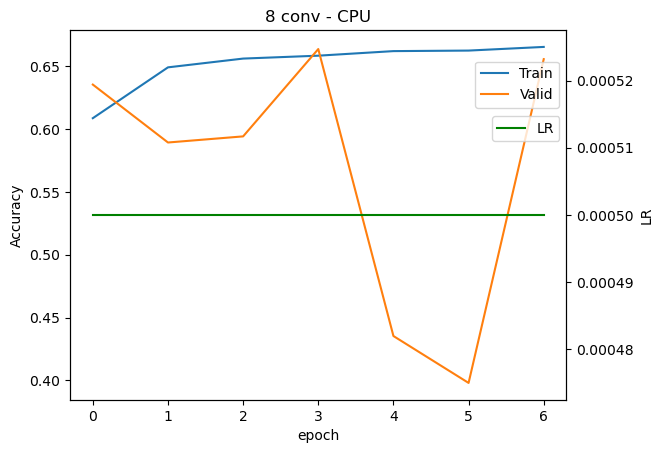

In [33]:
epochs = conv_tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, conv_tb.acc_train, '-', label = 'Train')
ax1.plot(epochs, conv_tb.acc_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Accuracy')

ax2 = ax1.twinx()
ax2.plot(epochs, conv_tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('8 conv - CPU')
ax1.legend(loc = (0.816, 0.79))
ax2.legend(loc = (0.85, 0.7))

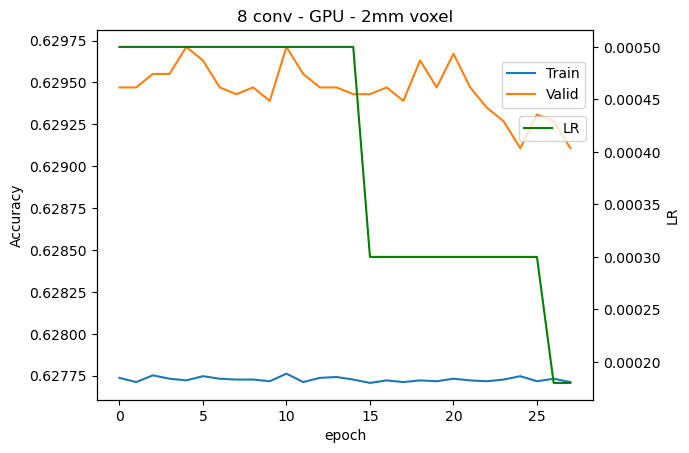

In [38]:
epochs = gpu_tb.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, gpu_tb.acc_train, '-', label = 'Train')
ax1.plot(epochs, gpu_tb.acc_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Accuracy')

ax2 = ax1.twinx()
ax2.plot(epochs, gpu_tb.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('8 conv - GPU - 2mm voxel')
ax1.legend(loc = (0.816, 0.79))
ax2.legend(loc = (0.85, 0.7))

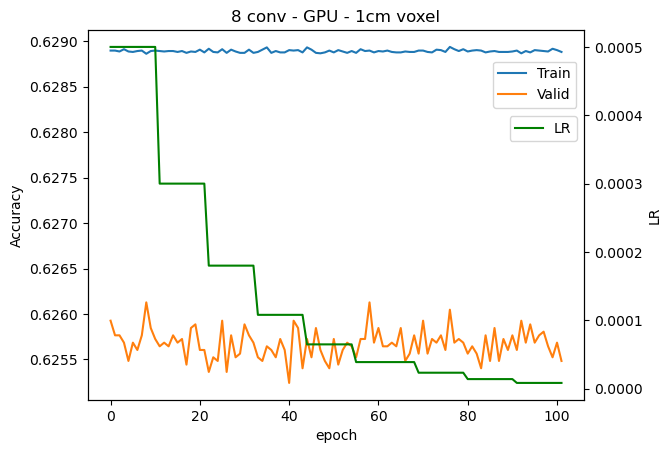

In [39]:
epochs = tb_1cm.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, tb_1cm.acc_train, '-', label = 'Train')
ax1.plot(epochs, tb_1cm.acc_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Accuracy')

ax2 = ax1.twinx()
ax2.plot(epochs, tb_1cm.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('8 conv - GPU - 1cm voxel')
ax1.legend(loc = (0.816, 0.79))
ax2.legend(loc = (0.85, 0.7))

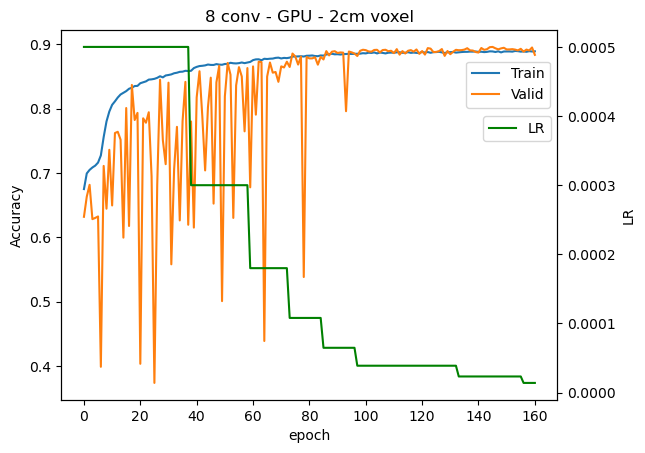

In [40]:
epochs = tb_2cm.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, tb_2cm.acc_train, '-', label = 'Train')
ax1.plot(epochs, tb_2cm.acc_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Accuracy')

ax2 = ax1.twinx()
ax2.plot(epochs, tb_2cm.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('8 conv - GPU - 2cm voxel')
ax1.legend(loc = (0.816, 0.79))
ax2.legend(loc = (0.85, 0.7))

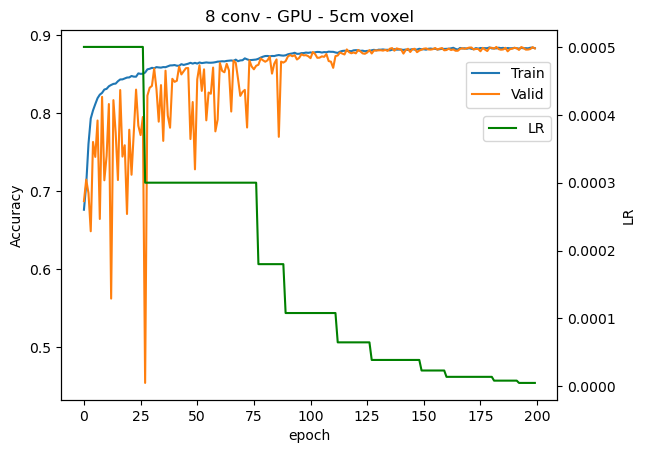

In [9]:
epochs = tb_5cm.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, tb_5cm.acc_train, '-', label = 'Train')
ax1.plot(epochs, tb_5cm.acc_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Accuracy')

ax2 = ax1.twinx()
ax2.plot(epochs, tb_5cm.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('8 conv - GPU - 5cm voxel')
ax1.legend(loc = (0.816, 0.79))
ax2.legend(loc = (0.85, 0.7))

In [15]:
prediction_1bar = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar/train/test_pred.h5', 'EventPred')

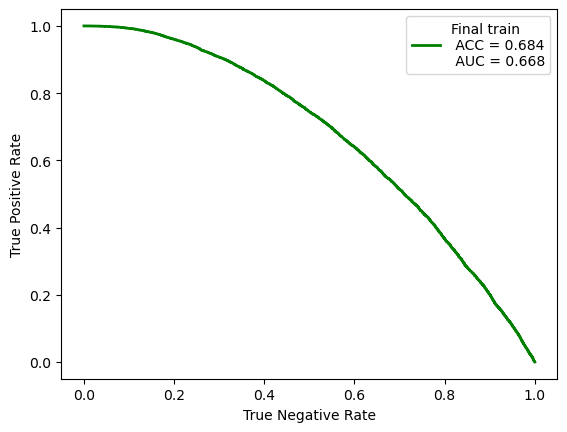

In [16]:

# Dictionary to store lines for each do value
line_dict = {}

y_true = prediction_1bar.binclass
y_pred = prediction_1bar.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_1bar[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_1bar.binclass.values) / len(prediction_1bar)

line, = plt.plot(1-fpr, tpr, 'g', lw = 2)
line_dict['Final train\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
plt.legend(line_dict.values(), line_dict.keys())
plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [7]:
tb_20bar = load_tensorboard_df('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/20bar/gpu_train/logs/events.out.tfevents.1715878333.c207-16.2629856.0')

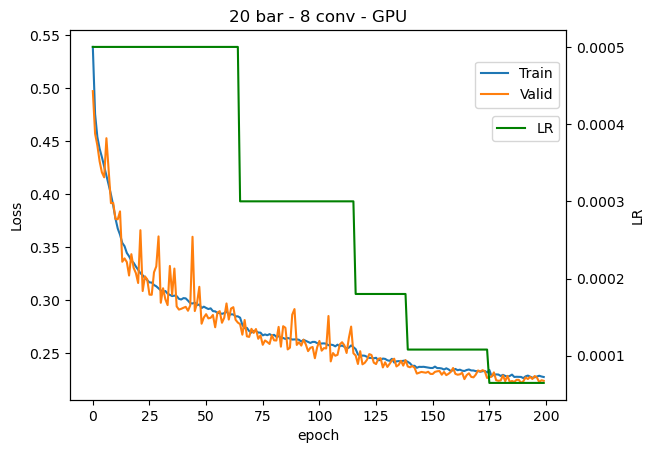

In [10]:
epochs = tb_20bar.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, tb_20bar.loss_train, '-', label = 'Train')
ax1.plot(epochs, tb_20bar.loss_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()
ax2.plot(epochs, tb_20bar.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('20 bar - 8 conv - GPU')
ax1.legend(loc = (0.816, 0.79))
ax2.legend(loc = (0.85, 0.7))

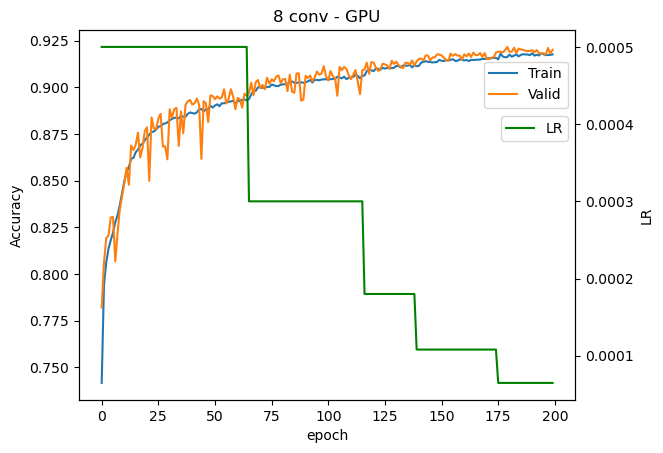

In [8]:
epochs = tb_20bar.step
# Create the plot
fig, ax1 = plt.subplots()

ax1.plot(epochs, tb_20bar.acc_train, '-', label = 'Train')
ax1.plot(epochs, tb_20bar.acc_valid, '-', label = 'Valid')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Accuracy')

ax2 = ax1.twinx()
ax2.plot(epochs, tb_20bar.lr, 'g-', label = 'LR')
ax2.set_ylabel('LR')
plt.title('20 bar - 8 conv - GPU')
ax1.legend(loc = (0.816, 0.79))
ax2.legend(loc = (0.85, 0.7))

# Different pressures comparison

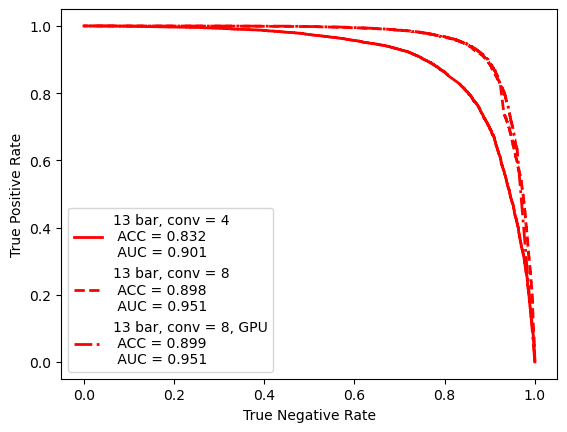

In [3]:
line_dict = {}

prediction_13bar = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/13bar/train/test_pred.h5', 'EventPred')
y_true = prediction_13bar.binclass
y_pred = prediction_13bar.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_13bar[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_13bar.binclass.values) / len(prediction_13bar)

line, = plt.plot(1-fpr, tpr, 'r', lw = 2)
line_dict['13 bar, conv = 4\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_13bar_conv = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/13bar/conv_train/test_pred.h5', 'EventPred')
y_true = prediction_13bar_conv.binclass
y_pred = prediction_13bar_conv.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_13bar_conv[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_13bar_conv.binclass.values) / len(prediction_13bar_conv)

line, = plt.plot(1-fpr, tpr, 'r--', lw = 2)
line_dict['13 bar, conv = 8\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_13bar_gpu = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/13bar/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_13bar_gpu.binclass
y_pred = prediction_13bar_gpu.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_13bar_gpu[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_13bar_gpu.binclass.values) / len(prediction_13bar_gpu)

line, = plt.plot(1-fpr, tpr, 'r-.', lw = 2)
line_dict['13 bar, conv = 8, GPU\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line

plt.legend(line_dict.values(), line_dict.keys())
plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')
plt.show()

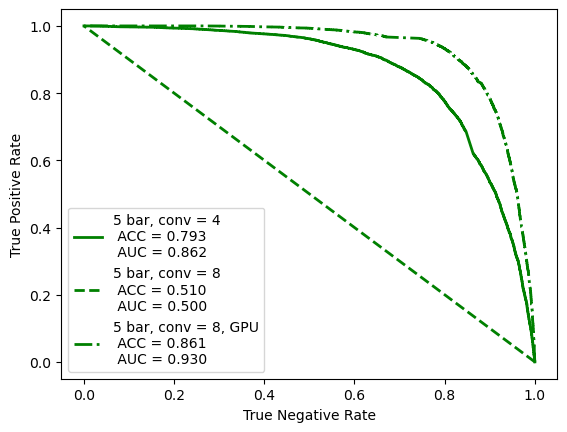

In [4]:
line_dict = {}
#########
prediction_5bar = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/5bar/train/test_pred.h5', 'EventPred')
y_true = prediction_5bar.binclass
y_pred = prediction_5bar.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_5bar[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_5bar.binclass.values) / len(prediction_5bar)

line, = plt.plot(1-fpr, tpr, 'g', lw = 2)
line_dict['5 bar, conv = 4\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_5bar_conv = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/5bar/conv_train/test_pred.h5', 'EventPred')
y_true = prediction_5bar_conv.binclass
y_pred = prediction_5bar_conv.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_5bar_conv[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_5bar_conv.binclass.values) / len(prediction_5bar_conv)

line, = plt.plot(1-fpr, tpr, 'g--', lw = 2)
line_dict['5 bar, conv = 8\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########

prediction_5bar_gpu = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/5bar/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_5bar_gpu.binclass
y_pred = prediction_5bar_gpu.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_5bar_gpu[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_5bar_gpu.binclass.values) / len(prediction_5bar_gpu)

line, = plt.plot(1-fpr, tpr, 'g-.', lw = 2)
line_dict['5 bar, conv = 8, GPU\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########

plt.legend(line_dict.values(), line_dict.keys())
plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')
plt.show()

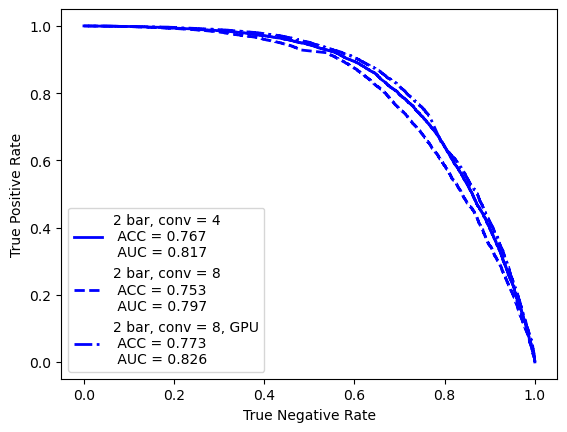

In [5]:
line_dict = {}

prediction_2bar = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/2bar/train/test_pred.h5', 'EventPred')
y_true = prediction_2bar.binclass
y_pred = prediction_2bar.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_2bar[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_2bar.binclass.values) / len(prediction_2bar)

line, = plt.plot(1-fpr, tpr, 'b', lw = 2)
line_dict['2 bar, conv = 4\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_2bar_conv = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/2bar/conv_train/test_pred.h5', 'EventPred')
y_true = prediction_2bar_conv.binclass
y_pred = prediction_2bar_conv.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_2bar_conv[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_2bar_conv.binclass.values) / len(prediction_2bar_conv)

line, = plt.plot(1-fpr, tpr, 'b--', lw = 2)
line_dict['2 bar, conv = 8\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_2bar_gpu = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/2bar/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_2bar_gpu.binclass
y_pred = prediction_2bar_gpu.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_2bar_gpu[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_2bar_gpu.binclass.values) / len(prediction_2bar_gpu)

line, = plt.plot(1-fpr, tpr, 'b-.', lw = 2)
line_dict['2 bar, conv = 8, GPU\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########

plt.legend(line_dict.values(), line_dict.keys())
plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')
plt.show()

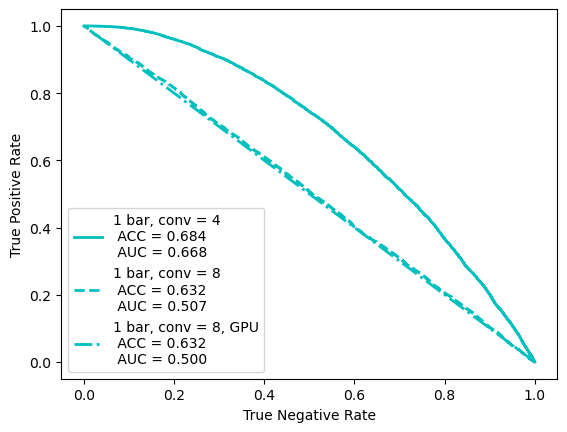

In [7]:
line_dict = {}

prediction_1bar = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar/train/test_pred.h5', 'EventPred')
y_true = prediction_1bar.binclass
y_pred = prediction_1bar.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_1bar[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_1bar.binclass.values) / len(prediction_1bar)

line, = plt.plot(1-fpr, tpr, 'c', lw = 2)
line_dict['1 bar, conv = 4\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_1bar_conv = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar/conv_train/test_pred.h5', 'EventPred')
y_true = prediction_1bar_conv.binclass
y_pred = prediction_1bar_conv.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_1bar_conv[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_1bar_conv.binclass.values) / len(prediction_1bar_conv)

line, = plt.plot(1-fpr, tpr, 'c--', lw = 2)
line_dict['1 bar, conv = 8\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_1bar_gpu = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_1bar_gpu.binclass
y_pred = prediction_1bar_gpu.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_1bar_gpu[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_1bar_gpu.binclass.values) / len(prediction_1bar_gpu)

line, = plt.plot(1-fpr, tpr, 'c-.', lw = 2)
line_dict['1 bar, conv = 8, GPU\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
plt.legend(line_dict.values(), line_dict.keys())
plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')
plt.show()

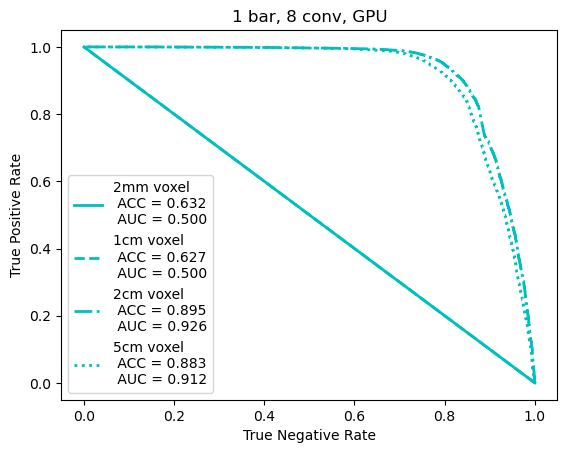

In [3]:
line_dict = {}

prediction_1bar_2mm = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_1bar_2mm.binclass
y_pred = prediction_1bar_2mm.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_1bar_2mm[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_1bar_2mm.binclass.values) / len(prediction_1bar_2mm)

line, = plt.plot(1-fpr, tpr, 'c', lw = 2)
line_dict['2mm voxel\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_1bar_1cm = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar_1cm/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_1bar_1cm.binclass
y_pred = prediction_1bar_1cm.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_1bar_1cm[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_1bar_1cm.binclass.values) / len(prediction_1bar_1cm)

line, = plt.plot(1-fpr, tpr, 'c--', lw = 2)
line_dict['1cm voxel\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_1bar_2cm = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar_2cm/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_1bar_2cm.binclass
y_pred = prediction_1bar_2cm.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_1bar_2cm[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_1bar_2cm.binclass.values) / len(prediction_1bar_2cm)

line, = plt.plot(1-fpr, tpr, 'c-.', lw = 2)
line_dict['2cm voxel\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_1bar_5cm = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar_5cm/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_1bar_5cm.binclass
y_pred = prediction_1bar_5cm.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_1bar_5cm[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_1bar_5cm.binclass.values) / len(prediction_1bar_5cm)

line, = plt.plot(1-fpr, tpr, 'c:', lw = 2)
line_dict['5cm voxel\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
plt.legend(line_dict.values(), line_dict.keys())
plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')
plt.title('1 bar, 8 conv, GPU')
plt.show()

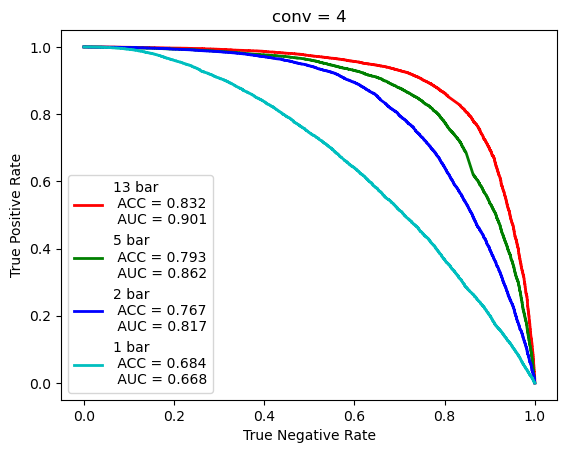

In [4]:
line_dict = {}

prediction_13bar = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/13bar/train/test_pred.h5', 'EventPred')
y_true = prediction_13bar.binclass
y_pred = prediction_13bar.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_13bar[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_13bar.binclass.values) / len(prediction_13bar)

line, = plt.plot(1-fpr, tpr, 'r', lw = 2)
line_dict['13 bar\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line

#########
prediction_5bar = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/5bar/train/test_pred.h5', 'EventPred')
y_true = prediction_5bar.binclass
y_pred = prediction_5bar.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_5bar[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_5bar.binclass.values) / len(prediction_5bar)

line, = plt.plot(1-fpr, tpr, 'g', lw = 2)
line_dict['5 bar\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_2bar = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/2bar/train/test_pred.h5', 'EventPred')
y_true = prediction_2bar.binclass
y_pred = prediction_2bar.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_2bar[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_2bar.binclass.values) / len(prediction_2bar)

line, = plt.plot(1-fpr, tpr, 'b', lw = 2)
line_dict['2 bar\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line

#########
prediction_1bar = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar/train/test_pred.h5', 'EventPred')
y_true = prediction_1bar.binclass
y_pred = prediction_1bar.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_1bar[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_1bar.binclass.values) / len(prediction_1bar)

line, = plt.plot(1-fpr, tpr, 'c', lw = 2)
line_dict['1 bar\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line


#########

plt.legend(line_dict.values(), line_dict.keys())
plt.title('conv = 4')
plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')
plt.show()

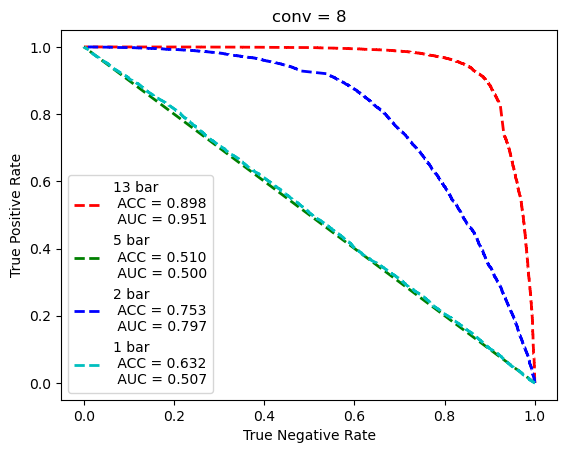

In [6]:
line_dict = {}
#########
prediction_13bar_conv = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/13bar/conv_train/test_pred.h5', 'EventPred')
y_true = prediction_13bar_conv.binclass
y_pred = prediction_13bar_conv.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_13bar_conv[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_13bar_conv.binclass.values) / len(prediction_13bar_conv)

line, = plt.plot(1-fpr, tpr, 'r--', lw = 2)
line_dict['13 bar\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_5bar_conv = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/5bar/conv_train/test_pred.h5', 'EventPred')
y_true = prediction_5bar_conv.binclass
y_pred = prediction_5bar_conv.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_5bar_conv[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_5bar_conv.binclass.values) / len(prediction_5bar_conv)

line, = plt.plot(1-fpr, tpr, 'g--', lw = 2)
line_dict['5 bar\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_2bar_conv = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/2bar/conv_train/test_pred.h5', 'EventPred')
y_true = prediction_2bar_conv.binclass
y_pred = prediction_2bar_conv.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_2bar_conv[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_2bar_conv.binclass.values) / len(prediction_2bar_conv)

line, = plt.plot(1-fpr, tpr, 'b--', lw = 2)
line_dict['2 bar\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_1bar_conv = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar/conv_train/test_pred.h5', 'EventPred')
y_true = prediction_1bar_conv.binclass
y_pred = prediction_1bar_conv.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_1bar_conv[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_1bar_conv.binclass.values) / len(prediction_1bar_conv)

line, = plt.plot(1-fpr, tpr, 'c--', lw = 2)
line_dict['1 bar\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line

plt.legend(line_dict.values(), line_dict.keys())
plt.title('conv = 8')
plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')
plt.show()

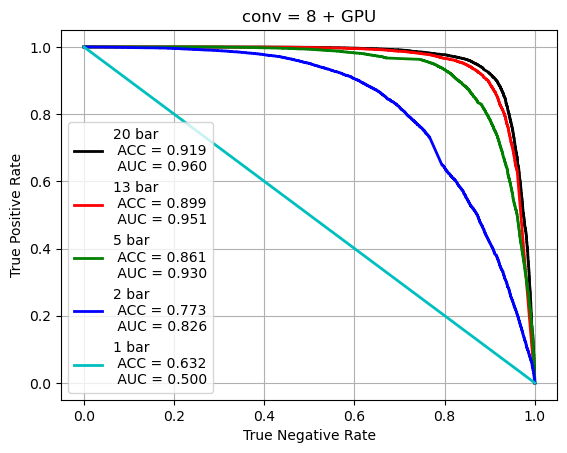

In [2]:
line_dict = {}
#########
prediction_20bar_gpu = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/20bar/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_20bar_gpu.binclass
y_pred = prediction_20bar_gpu.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_20bar_gpu[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_20bar_gpu.binclass.values) / len(prediction_20bar_gpu)

line, = plt.plot(1-fpr, tpr, 'k-', lw = 2)
line_dict['20 bar\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_13bar_gpu = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/13bar/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_13bar_gpu.binclass
y_pred = prediction_13bar_gpu.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_13bar_gpu[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_13bar_gpu.binclass.values) / len(prediction_13bar_gpu)

line, = plt.plot(1-fpr, tpr, 'r-', lw = 2)
line_dict['13 bar\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line

#########

prediction_5bar_gpu = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/5bar/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_5bar_gpu.binclass
y_pred = prediction_5bar_gpu.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_5bar_gpu[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_5bar_gpu.binclass.values) / len(prediction_5bar_gpu)

line, = plt.plot(1-fpr, tpr, 'g-', lw = 2)
line_dict['5 bar\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_2bar_gpu = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/2bar/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_2bar_gpu.binclass
y_pred = prediction_2bar_gpu.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_2bar_gpu[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_2bar_gpu.binclass.values) / len(prediction_2bar_gpu)

line, = plt.plot(1-fpr, tpr, 'b-', lw = 2)
line_dict['2 bar\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
#########
prediction_1bar_gpu = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_1bar_gpu.binclass
y_pred = prediction_1bar_gpu.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_1bar_gpu[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_1bar_gpu.binclass.values) / len(prediction_1bar_gpu)

line, = plt.plot(1-fpr, tpr, 'c-', lw = 2)
line_dict['1 bar\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
# prediction_1bar_2cm = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar_2cm/gpu_train/test_pred.h5', 'EventPred')
# y_true = prediction_1bar_2cm.binclass
# y_pred = prediction_1bar_2cm.class_1
# fpr, tpr, thresholds = roc_curve(y_true, y_pred)
# roc_auc = auc(fpr, tpr)

# acc = sum(prediction_1bar_2cm[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_1bar_2cm.binclass.values) / len(prediction_1bar_2cm)

# line, = plt.plot(1-fpr, tpr, 'c--', lw = 2)
# line_dict['1 bar, 2cm voxel\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line

plt.legend(line_dict.values(), line_dict.keys())
plt.title('conv = 8 + GPU')
plt.grid()
plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')
plt.show()

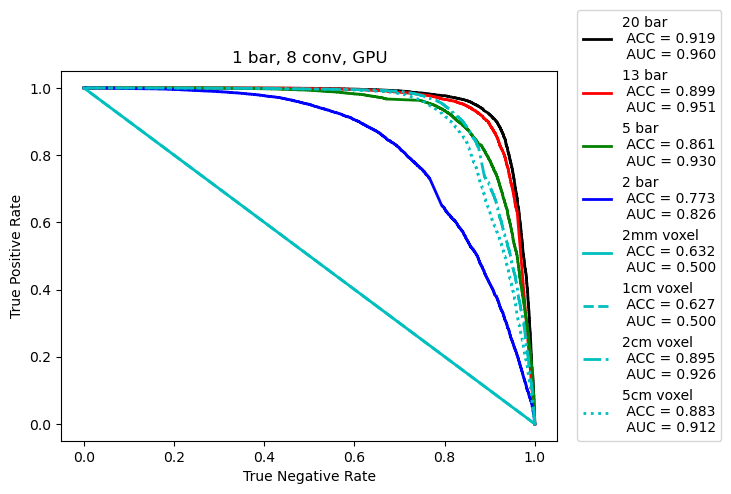

In [4]:
line_dict = {}
#########
prediction_20bar_gpu = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/20bar/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_20bar_gpu.binclass
y_pred = prediction_20bar_gpu.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_20bar_gpu[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_20bar_gpu.binclass.values) / len(prediction_20bar_gpu)

line, = plt.plot(1-fpr, tpr, 'k-', lw = 2)
line_dict['20 bar\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_13bar_gpu = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/13bar/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_13bar_gpu.binclass
y_pred = prediction_13bar_gpu.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_13bar_gpu[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_13bar_gpu.binclass.values) / len(prediction_13bar_gpu)

line, = plt.plot(1-fpr, tpr, 'r-', lw = 2)
line_dict['13 bar\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line

#########

prediction_5bar_gpu = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/5bar/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_5bar_gpu.binclass
y_pred = prediction_5bar_gpu.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_5bar_gpu[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_5bar_gpu.binclass.values) / len(prediction_5bar_gpu)

line, = plt.plot(1-fpr, tpr, 'g-', lw = 2)
line_dict['5 bar\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line

#########

prediction_2bar_gpu = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/2bar/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_2bar_gpu.binclass
y_pred = prediction_2bar_gpu.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_2bar_gpu[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_2bar_gpu.binclass.values) / len(prediction_2bar_gpu)

line, = plt.plot(1-fpr, tpr, 'b-', lw = 2)
line_dict['2 bar\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line

#########



#########
prediction_1bar_2mm = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_1bar_2mm.binclass
y_pred = prediction_1bar_2mm.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_1bar_2mm[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_1bar_2mm.binclass.values) / len(prediction_1bar_2mm)

line, = plt.plot(1-fpr, tpr, 'c', lw = 2)
line_dict['2mm voxel\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_1bar_1cm = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar_1cm/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_1bar_1cm.binclass
y_pred = prediction_1bar_1cm.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_1bar_1cm[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_1bar_1cm.binclass.values) / len(prediction_1bar_1cm)

line, = plt.plot(1-fpr, tpr, 'c--', lw = 2)
line_dict['1cm voxel\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_1bar_2cm = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar_2cm/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_1bar_2cm.binclass
y_pred = prediction_1bar_2cm.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_1bar_2cm[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_1bar_2cm.binclass.values) / len(prediction_1bar_2cm)

line, = plt.plot(1-fpr, tpr, 'c-.', lw = 2)
line_dict['2cm voxel\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_1bar_5cm = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar_5cm/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_1bar_5cm.binclass
y_pred = prediction_1bar_5cm.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_1bar_5cm[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_1bar_5cm.binclass.values) / len(prediction_1bar_5cm)

line, = plt.plot(1-fpr, tpr, 'c:', lw = 2)
line_dict['5cm voxel\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
plt.legend(line_dict.values(), line_dict.keys(), loc = (1.04, 0))
plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')
plt.title('1 bar, 8 conv, GPU')
plt.show()

In [59]:
# pressures = ['20bar', '13bar', '5bar', '2bar', '1bar']

# test_pred_path = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/{p}/gpu_train/test_pred.h5'

# roc_df = pd.DataFrame([])
# for p in pressures:
#     pred = pd.read_hdf(test_pred_path.format(p=p), 'EventPred')
#     y_true = pred.binclass
#     y_pred = pred.class_1
#     fpr, tpr, thresholds = roc_curve(y_true, y_pred)

#     dct = {'fpr':fpr, 'tpr':tpr, 'thr':thresholds}
#     df = pd.DataFrame(dct)
#     df['pressure'] = p
#     roc_df = roc_df.append(df)

# roc_df.to_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/roc.h5', 'ROC')

In [54]:
tb = load_tensorboard_df('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/20bar/gpu_train/logs/events.out.tfevents.1715878333.c207-16.2629856.0')

In [56]:
print('Mean time per epoch: ', ((tb.wall_time.shift(-1) - tb.wall_time ) / 60).mean(), ' mins')

Mean time per epoch:  1.4910544805390957  mins


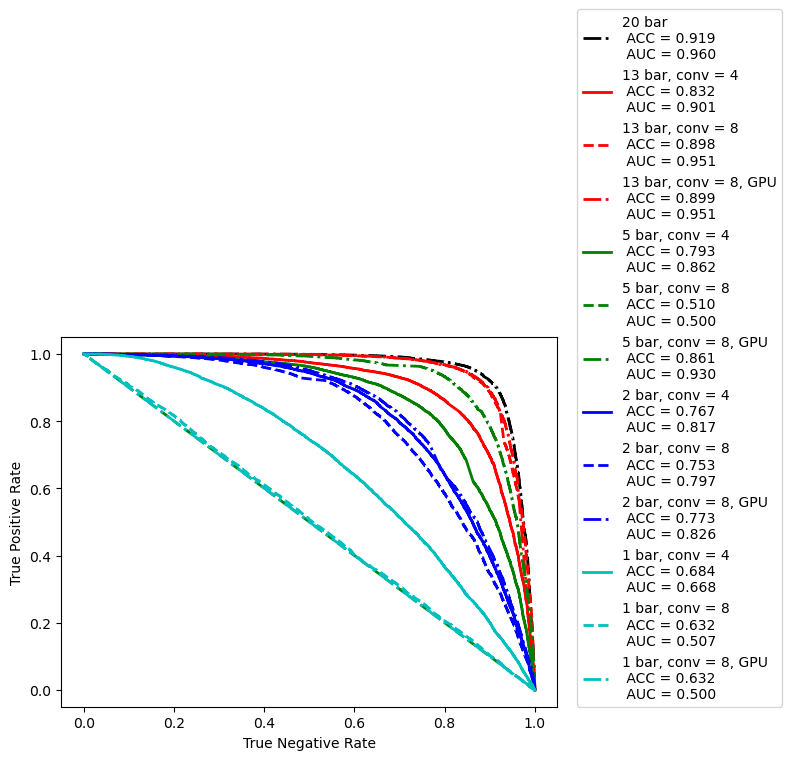

In [5]:
line_dict = {}

#########
prediction_20bar_gpu = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/20bar/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_20bar_gpu.binclass
y_pred = prediction_20bar_gpu.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_20bar_gpu[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_20bar_gpu.binclass.values) / len(prediction_20bar_gpu)

line, = plt.plot(1-fpr, tpr, 'k-.', lw = 2)
line_dict['20 bar\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_13bar = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/13bar/train/test_pred.h5', 'EventPred')
y_true = prediction_13bar.binclass
y_pred = prediction_13bar.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_13bar[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_13bar.binclass.values) / len(prediction_13bar)

line, = plt.plot(1-fpr, tpr, 'r', lw = 2)
line_dict['13 bar, conv = 4\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_13bar_conv = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/13bar/conv_train/test_pred.h5', 'EventPred')
y_true = prediction_13bar_conv.binclass
y_pred = prediction_13bar_conv.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_13bar_conv[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_13bar_conv.binclass.values) / len(prediction_13bar_conv)

line, = plt.plot(1-fpr, tpr, 'r--', lw = 2)
line_dict['13 bar, conv = 8\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_13bar_gpu = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/13bar/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_13bar_gpu.binclass
y_pred = prediction_13bar_gpu.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_13bar_gpu[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_13bar_gpu.binclass.values) / len(prediction_13bar_gpu)

line, = plt.plot(1-fpr, tpr, 'r-.', lw = 2)
line_dict['13 bar, conv = 8, GPU\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_5bar = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/5bar/train/test_pred.h5', 'EventPred')
y_true = prediction_5bar.binclass
y_pred = prediction_5bar.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_5bar[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_5bar.binclass.values) / len(prediction_5bar)

line, = plt.plot(1-fpr, tpr, 'g', lw = 2)
line_dict['5 bar, conv = 4\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_5bar_conv = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/5bar/conv_train/test_pred.h5', 'EventPred')
y_true = prediction_5bar_conv.binclass
y_pred = prediction_5bar_conv.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_5bar_conv[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_5bar_conv.binclass.values) / len(prediction_5bar_conv)

line, = plt.plot(1-fpr, tpr, 'g--', lw = 2)
line_dict['5 bar, conv = 8\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########

prediction_5bar_gpu = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/5bar/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_5bar_gpu.binclass
y_pred = prediction_5bar_gpu.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_5bar_gpu[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_5bar_gpu.binclass.values) / len(prediction_5bar_gpu)

line, = plt.plot(1-fpr, tpr, 'g-.', lw = 2)
line_dict['5 bar, conv = 8, GPU\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_2bar = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/2bar/train/test_pred.h5', 'EventPred')
y_true = prediction_2bar.binclass
y_pred = prediction_2bar.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_2bar[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_2bar.binclass.values) / len(prediction_2bar)

line, = plt.plot(1-fpr, tpr, 'b', lw = 2)
line_dict['2 bar, conv = 4\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_2bar_conv = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/2bar/conv_train/test_pred.h5', 'EventPred')
y_true = prediction_2bar_conv.binclass
y_pred = prediction_2bar_conv.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_2bar_conv[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_2bar_conv.binclass.values) / len(prediction_2bar_conv)

line, = plt.plot(1-fpr, tpr, 'b--', lw = 2)
line_dict['2 bar, conv = 8\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_2bar_gpu = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/2bar/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_2bar_gpu.binclass
y_pred = prediction_2bar_gpu.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_2bar_gpu[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_2bar_gpu.binclass.values) / len(prediction_2bar_gpu)

line, = plt.plot(1-fpr, tpr, 'b-.', lw = 2)
line_dict['2 bar, conv = 8, GPU\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_1bar = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar/train/test_pred.h5', 'EventPred')
y_true = prediction_1bar.binclass
y_pred = prediction_1bar.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_1bar[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_1bar.binclass.values) / len(prediction_1bar)

line, = plt.plot(1-fpr, tpr, 'c', lw = 2)
line_dict['1 bar, conv = 4\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_1bar_conv = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar/conv_train/test_pred.h5', 'EventPred')
y_true = prediction_1bar_conv.binclass
y_pred = prediction_1bar_conv.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_1bar_conv[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_1bar_conv.binclass.values) / len(prediction_1bar_conv)

line, = plt.plot(1-fpr, tpr, 'c--', lw = 2)
line_dict['1 bar, conv = 8\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
#########
prediction_1bar_gpu = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar/gpu_train/test_pred.h5', 'EventPred')
y_true = prediction_1bar_gpu.binclass
y_pred = prediction_1bar_gpu.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(prediction_1bar_gpu[['class_0', 'class_1']].values.argmax(axis = 1) == prediction_1bar_gpu.binclass.values) / len(prediction_1bar_gpu)

line, = plt.plot(1-fpr, tpr, 'c-.', lw = 2)
line_dict['1 bar, conv = 8, GPU\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line
plt.legend(line_dict.values(), line_dict.keys(), loc = (1.04, 0))
plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [47]:
def fom_creator(pred, ths = np.arange(0.01, 1, 0.01)):
    fom = []
    for th in ths:
        sig_eff = len(pred[(y_pred >= th) & (pred.binclass == 1)]) / len(pred[pred.binclass == 1])
        bkg_rej = len(pred[(y_pred >= th) & (pred.binclass == 0)]) / len(pred[pred.binclass == 0])

        # tp = len(pred[(y_pred >= th) & (pred.binclass == 1)])
        # tn = len(pred[(y_pred <  th) & (pred.binclass == 0)])
        # fp = len(pred[(y_pred >= th) & (pred.binclass == 0)])
        # fn = len(pred[(y_pred <  th) & (pred.binclass == 1)])    
        # sig_eff = tp / (tp + fn)
        # bkg_rej = fp / (fp + tn)

        fom.append(sig_eff / np.sqrt(bkg_rej))
    return np.array(fom)

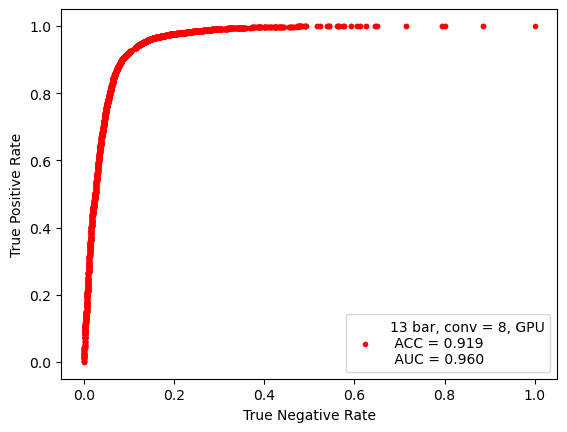

Best FOM Threshold: 0.8959987


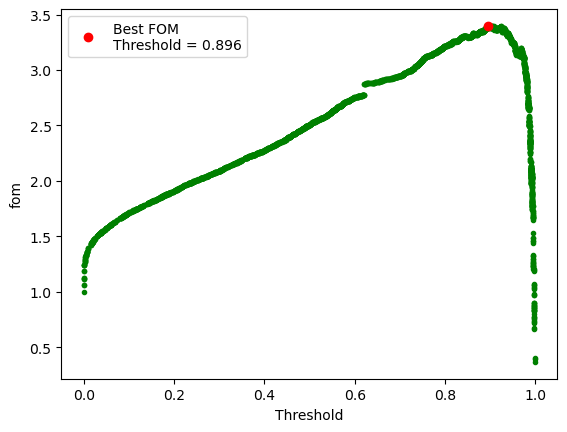

Best FOM Threshold: 0.9991


/scratch/7284155/ipykernel_1136280/1583151784.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  fom.append(sig_eff / np.sqrt(bkg_rej))


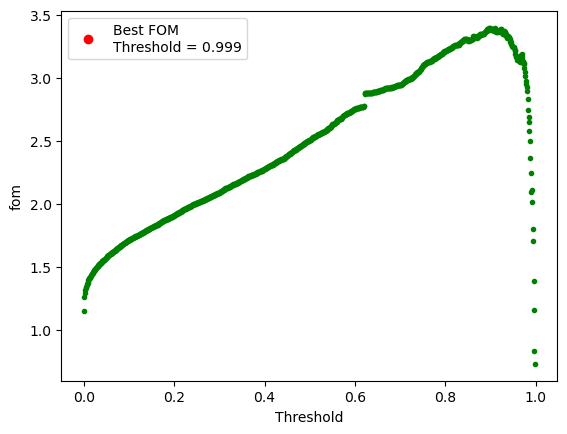

In [44]:
line_dict = {}
pred = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/20bar/gpu_train/test_pred.h5', 'EventPred')
y_true = pred.binclass
y_pred = pred.class_1
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = sum(pred[['class_0', 'class_1']].values.argmax(axis = 1) == pred.binclass.values) / len(pred)

line, = plt.plot(fpr, tpr, 'r.', lw = 2)
line_dict['13 bar, conv = 8, GPU\n ACC = {:.3f}\n AUC = {:.3f}'.format(acc, roc_auc)] = line

plt.legend(line_dict.values(), line_dict.keys())
plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')

plt.show()

#Quito los 0 de FPR para evitar conflictos
nonzero = ~(fpr == 0)
nonzero_tpr = tpr[nonzero]
nonzero_fpr = fpr[nonzero]
nonzero_thr = thresholds[nonzero]
#Calculo FOM
fom = nonzero_tpr/np.sqrt(nonzero_fpr)

#Busco el máximo
best_fom_pos = np.argmax(fom)
best_fom_thr = nonzero_thr[best_fom_pos]
print("Best FOM Threshold:", best_fom_thr)

plt.plot(nonzero_thr, fom, 'g.')
plt.plot(best_fom_thr, fom[best_fom_pos], 'ro', label='Best FOM\nThreshold = {:.3f}'.format(best_fom_thr))
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('fom')
plt.show()


#Veamos calculando la FOM a mano
thr = np.arange(0.0001, 1, 0.001)
fom = fom_creator(pred, ths= thr)
#Busco el máximo
best_fom_pos = np.argmax(fom)
best_fom_thr = thr[best_fom_pos]
print("Best FOM Threshold:", best_fom_thr)

plt.plot(thr, fom, 'g.')
plt.plot(best_fom_thr, fom[best_fom_pos], 'ro', label='Best FOM\nThreshold = {:.3f}'.format(best_fom_thr))
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('fom')
plt.show()


# plt.plot(1-fpr, tpr, 'g', lw = 2, label = 'Final train\nAUC = {:.3f}'.format(roc_auc))
# plt.plot(1 - fpr[best_position], tpr[best_position], 'ob', label='Best value\nThreshold = {:.3f}'.format(best_threshold))
# plt.plot(1 - fpr[best_fom_pos], tpr[best_fom_pos],   'or', label='Best FOM\nThreshold = {:.3f}'.format(best_fom_thr))
# plt.plot([0, 1], [1, 0], '--', label = 'Ramdom classifier')
# plt.legend()
# plt.xlabel('True Negative Rate')
# plt.ylabel('True Positive Rate')
# plt.show()

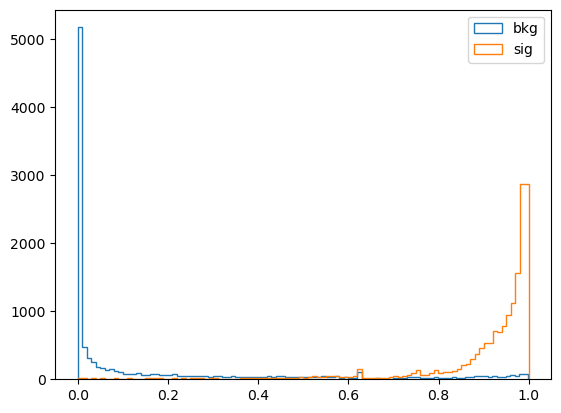

In [45]:
plt.hist(pred[pred.binclass == 0].class_1, 100, histtype='step', label = 'bkg')
plt.hist(pred[pred.binclass == 1].class_1, 100, histtype='step', label = 'sig')
plt.legend()
plt.show()

In [12]:
vox_13bar_0nubb = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/13bar/0nubb/label/voxel_dataset_13bar_0nubb.h5', 'voxels')

In [22]:
nevents = len(vox_13bar_0nubb[['file_id', 'event']].drop_duplicates())

sum_df = vox_13bar_0nubb.groupby(['file_id', 'event']).sum()

tot_ener   = sum_df.E
tot_nhits  = sum_df.nhits

mean_df = vox_13bar_0nubb.groupby(['file_id', 'event']).mean()
mean_x, mean_y, mean_z = mean_df.x, mean_df.y, mean_df.z
mean_vox_ener  = mean_df.E
mean_vox_nhits = mean_df.nhits


In [31]:
tot_ener[tot_ener > 2.5]

file_id  event
119      301      2.688290
163      207      2.696130
211      16       2.744803
239      316      2.771356
Name: E, dtype: float64

In [63]:
vox_13bar_0nubb[(vox_13bar_0nubb.file_id == 163) & (vox_13bar_0nubb.event == 207) & (vox_13bar_0nubb.ext != 0)]

file_id  event   x    y   z       E  binclass  segclass  track_id  \
28026      163    207  86  217  14  0.2383         1         2         0   
28027      163    207  86  217  14  0.2383         1         2         0   

       nhits  ext  
28026     39    1  
28027     39    2

In [70]:
hits = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/1bar/0nubb/nexus/nexus_120_0nubb.h5', 'MC/hits')

In [71]:
results = []
for id, df in hits.groupby('event_id'): results.append([df.count().energy, df.sum().energy, '1bar', id, 119]) 

In [74]:
df = pd.DataFrame(results, columns = ['nhits', 'tot_ene', 'pressure', 'event_id', 'filenum'])

In [75]:
savedir = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/prueba.h5'

In [78]:
df.to_hdf(savedir, '0nubb', append=True)

In [79]:
pd.read_hdf(savedir, '0nubb')

nhits   tot_ene pressure  event_id  filenum
0    5468  2.457830    13bar    457555      119
1    5165  2.457830    13bar    457556      119
2    5415  2.457339    13bar    457557      119
3    5309  2.457830    13bar    457558      119
4    4804  2.338447    13bar    457559      119
..    ...       ...      ...       ...      ...
65   5250  2.457830    13bar    457620      119
66   5071  2.457830    13bar    457621      119
67   5581  2.457357    13bar    457622      119
68   5399  2.457830    13bar    457623      119
69   5231  2.457830    13bar    457624      119

[140 rows x 5 columns]

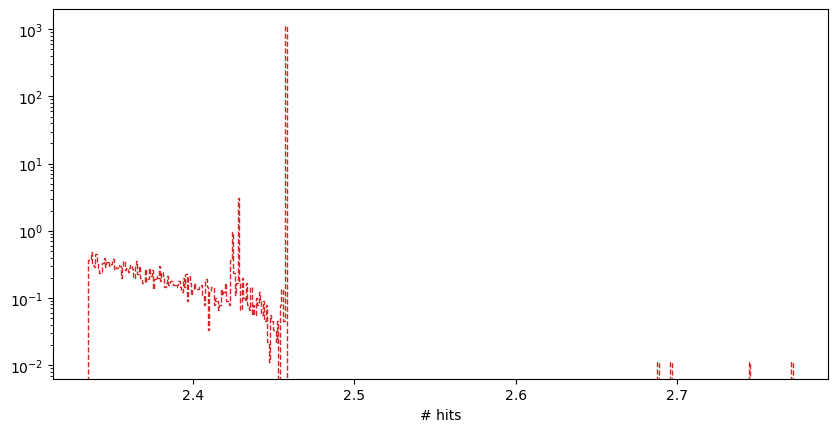

In [29]:
p = '13bar'
plot_dict = {'1bar':'tab:blue', '2bar':'tab:orange', '5bar':'tab:green', '13bar':'tab:red'}
plt.figure(1, figsize = (10, 4.8))
# plt.hist(num_hits_1eroi, 50, color = plot_dict[p], ls = '-', density = True, histtype = 'step', label=p)
plt.hist(tot_ener, 500, color = plot_dict[p], ls = '--', density = True, histtype = 'step')
plt.xlabel('# hits')
plt.yscale('log')